# nuScenes Identifying Turns

We use two different ways for identifying turning scenes:
1. Compute the trajectory curvature
2. Query the annotated descriptions to find the turns



In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from nuscenes.nuscenes import NuScenes
import nuscenes.utils.nb_utils as nbutils

nusc = NuScenes(version='v1.0', dataroot='/home/noam/nuscenes/full_data_set', verbose=True)

Loading NuScenes tables for version v1.0...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 38.1 seconds.
Reverse indexing ...
Done reverse indexing in 10.2 seconds.


### 2. Computing the Curvature

### Plotting Trajectories w/ Curvature

In [3]:
nusc.scene[0]

{'token': '73030fb67d3c46cfb5e590168088ae39',
 'log_token': '6b6513e6c8384cec88775cae30b78c0e',
 'nbr_samples': 40,
 'first_sample_token': 'e93e98b63d3b40209056d129dc53ceee',
 'last_sample_token': '40e413c922184255a94f08d3c10037e0',
 'name': 'scene-0001',
 'description': 'Construction, maneuver between several trucks'}

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
## Getting a weird warning "RuntimeWarning: divide by zero encountered in true_divide"

list_of_high_curvature_scene_tokens = set([])
for scene in nusc.scene:
    pose_array = nbutils.get_ego_positions_from_scene(nusc, scene)
    curvature = nbutils.compute_curvature_from_array(pose_array)
    dx = np.gradient(pose_array[0,:])
#     pose_array = pose_array[:,curvature<.5]
#     curvature = curvature[curvature<.5]
    pose_array = pose_array[:,np.abs(dx)>1e-4]
    curvature = curvature[np.abs(dx)>1e-4]

    if len(curvature) == 0:
        continue
    max_curv, min_curv = np.max(np.abs(curvature)), np.min(np.abs(curvature))
    if len(curvature) < 11:
        continue
    max_curv_mid, min_curv_mid = np.max(np.abs(curvature[5:-5])), np.min(np.abs(curvature)[5:-5])
    if max_curv > 0.10:
        list_of_high_curvature_scene_tokens.add(scene['token'])
#     if location == "boston-seaport":
#         plt.title('Max Curvature %.02f'%max_curv)
#         plt.scatter(pose_array[0,:], pose_array[1,:],c=curvature)
#         ax = plt.gca()
#         ax.axis('equal')

#         plt.colorbar()
#         plt.show()    

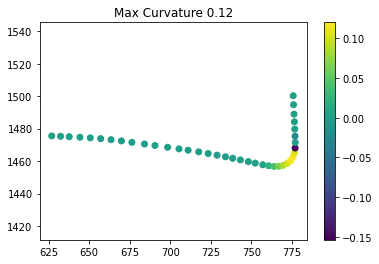

095d9b93b583425f910ae2afaf1d017d
singapore-onenorth


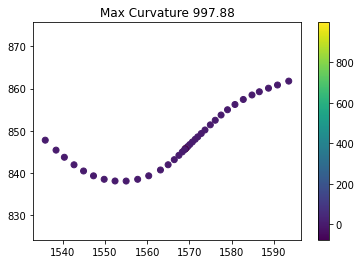

41e0d46e715a476ab05e4d62e415ea41
boston-seaport


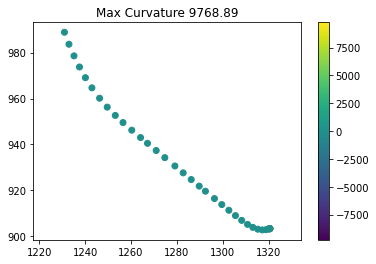

cfa36eca40364e5bb15f550a077a21c5
singapore-hollandvillage


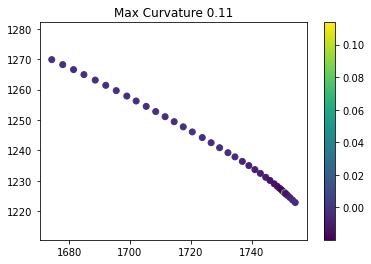

3ada261efee347cba2e7557794f1aec8
boston-seaport


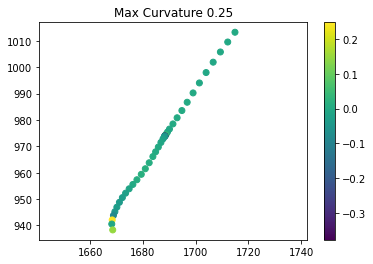

634a8c5835e44aec912604a9a1972a5d
boston-seaport


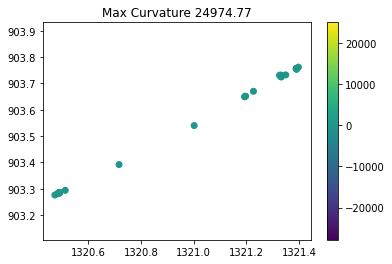

e233467e827140efa4b42d2b4c435855
singapore-hollandvillage


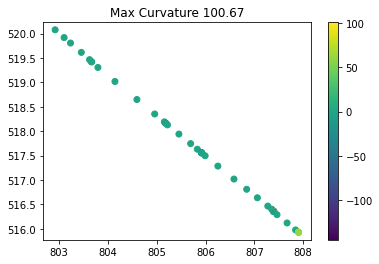

f12b4e7fb95646ec9dac305076024bb9
boston-seaport


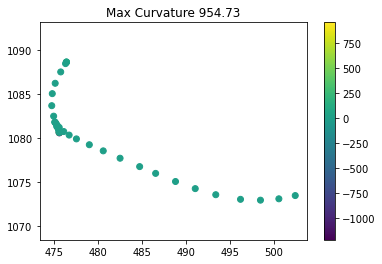

209e9e9c3a2e4a399c44b6aa8be659d6
singapore-onenorth


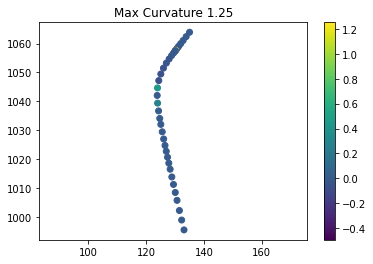

8857cf15fa7049a6b000490835d3b9fc
singapore-onenorth


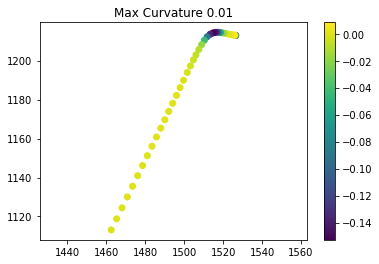

de7d80a1f5fb4c3e82ce8a4f213b450a
singapore-hollandvillage


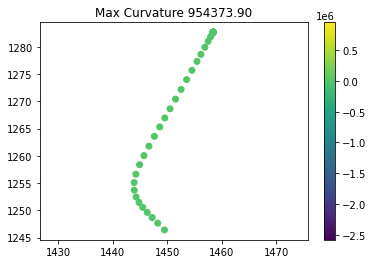

c4ab236557c8423caa8add5fb48a0898
boston-seaport


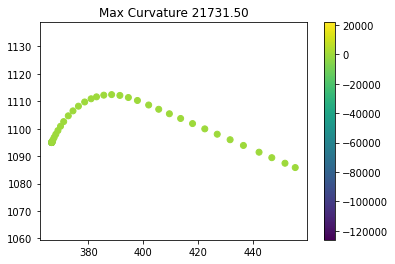

fcc020250f884397965ba00c1d9ad9e6
singapore-onenorth


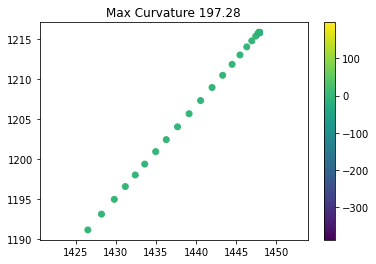

717053dec2ef4baa913ba1e24c09edff
boston-seaport


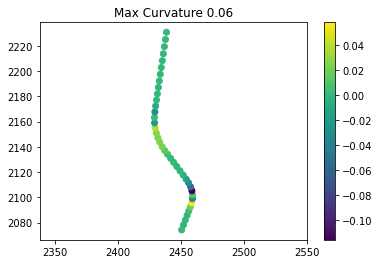

7052d21b95fc4bae8761b8d9524f3e42
singapore-hollandvillage


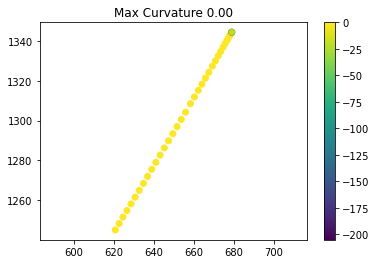

406a61a4d394432e95a7e8426a97551f
boston-seaport


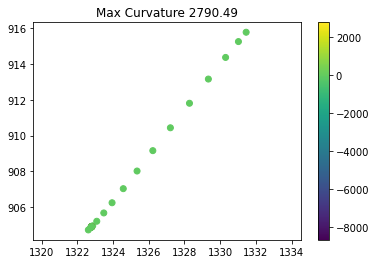

3ace9decdd1f4ea0915b9862c95ca128
singapore-hollandvillage


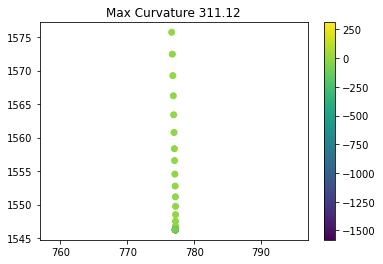

1c89941a6935484182ca19eddcd3bc77
singapore-onenorth


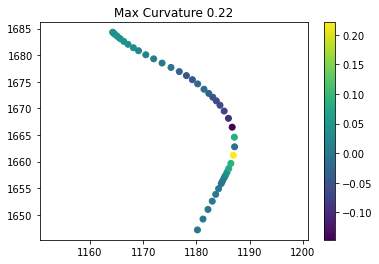

1c76efe7d0b048bc815c0445eeaa76ab
boston-seaport


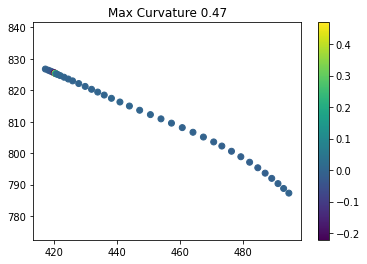

2f0e54af35964a3fb347359836bec035
boston-seaport


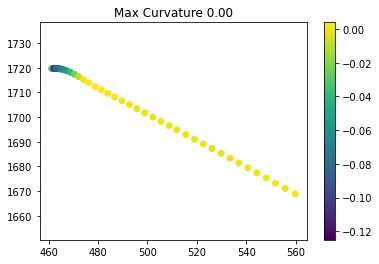

892ed06c432448fe87ecb5d31756f14a
boston-seaport


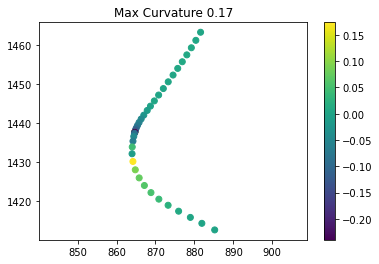

21464a6831c1443db294d1b56a7a33a5
singapore-onenorth


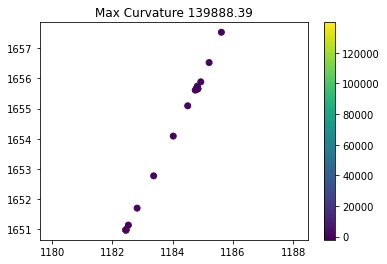

c77e6ecf108c4c8b80d35d84642c805f
boston-seaport


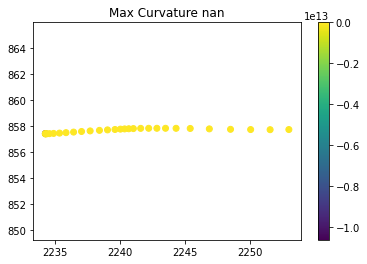

0d2cc345342a460e94ff54748338ac22
boston-seaport


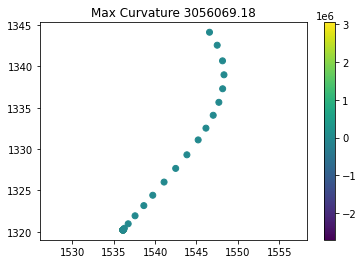

c31adab2faea4db6ae5673eb8a507d00
boston-seaport


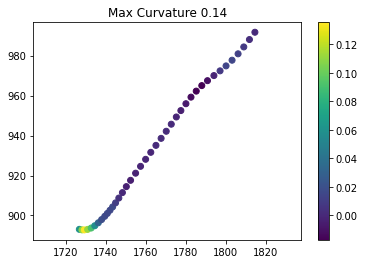

fd5a3c6d3ad44954a8045edbe9d93763
boston-seaport


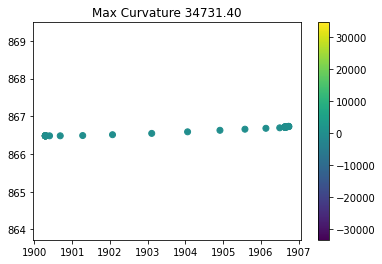

30e77a3561ce4f1bb4fd90e322ea29d7
boston-seaport


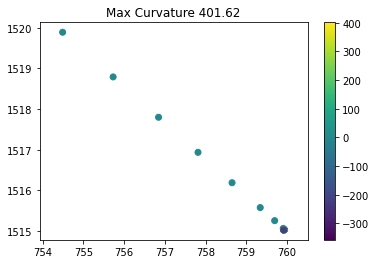

85a9c262809d4ac49d2a9b1f8a1487e8
boston-seaport


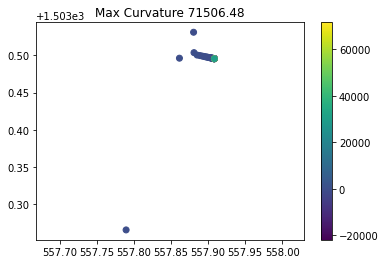

c468cdcc838143d480b5b9c835c8380c
boston-seaport


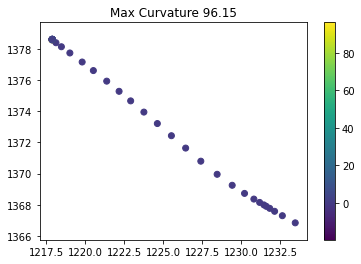

8e3364691ee94c698458e0913a29af78
boston-seaport


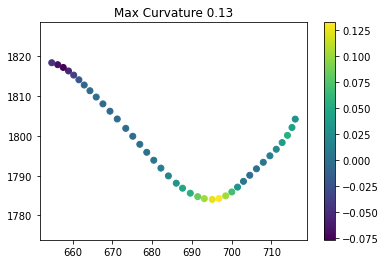

4431d97ea17044ad9c09c13d16684054
singapore-queenstown


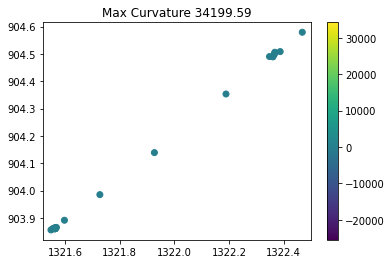

cdeb0e85e43e481a87b2251351e10c2f
singapore-hollandvillage


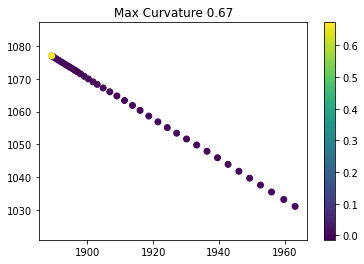

210add02013a4dfa84b7c5e23058781f
boston-seaport


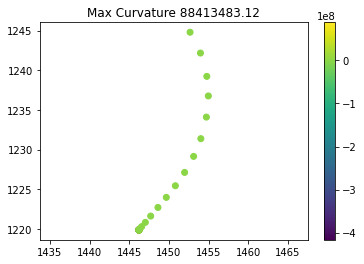

ed242d80ccb34b139aaf9ab89859332e
boston-seaport


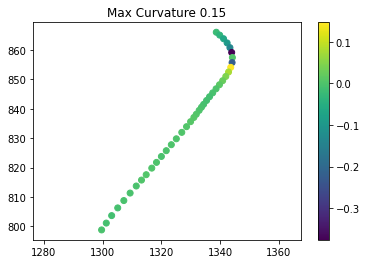

d6e6f5d622474271b695f4c7f07df7bb
boston-seaport


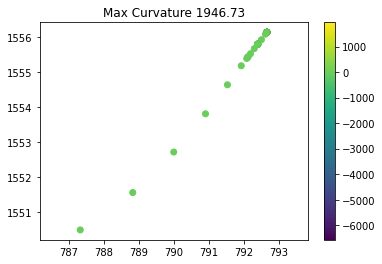

748894952b00431186308b387c2f424c
singapore-queenstown


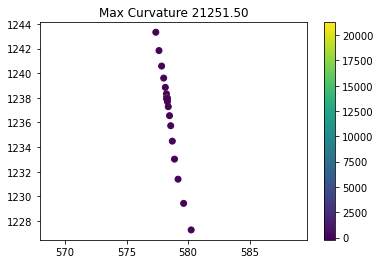

9eaabad9385b4fe1b9f397edead326ac
singapore-onenorth


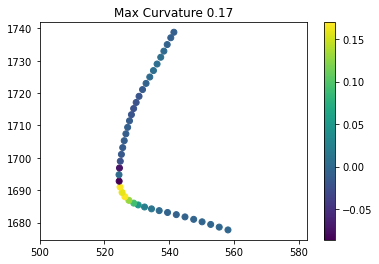

b09162caded44198b149b4bce3558056
singapore-queenstown


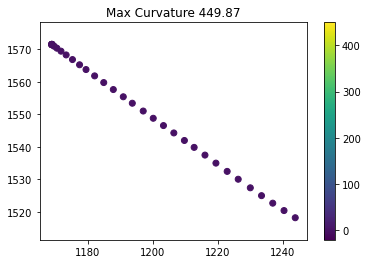

3289046b886f4c98a676bd7e6a3c6ef1
boston-seaport


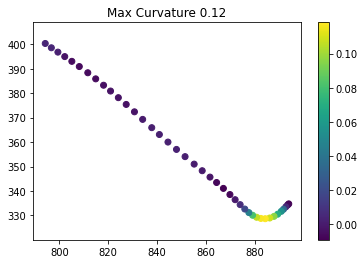

37a37b06ba5e4f978fc6cb77e90f2498
boston-seaport


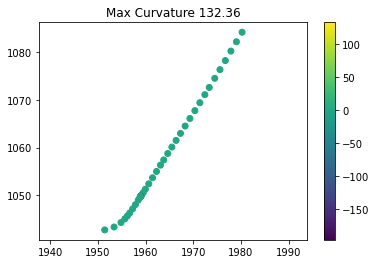

521f01dfc8c9402e8309e047e2eea112
boston-seaport


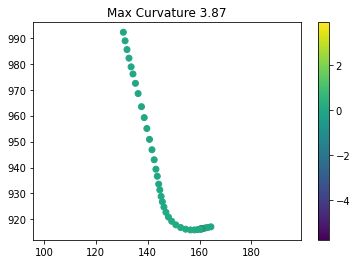

37284f813cc74496971ff58f5d37400a
singapore-onenorth


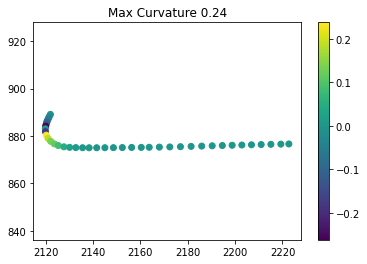

ccf96ecd7161425ba7c5b5dbad79b600
boston-seaport


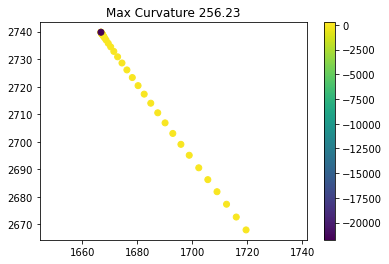

f24b4682fbb9482aba149534deed1cc9
singapore-queenstown


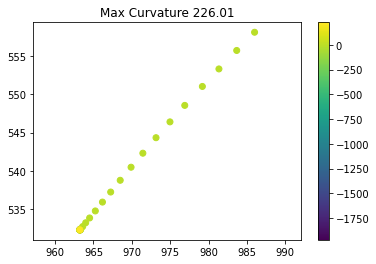

54cdaaae372d421fa4734d66f51a8c48
singapore-onenorth


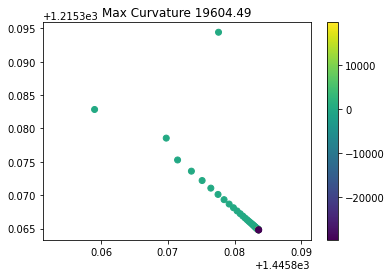

50ff554b3ecb4d208849d042b7643715
boston-seaport


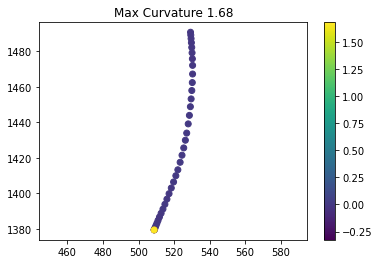

6746ba640c0e45c7961efbe6af51757e
singapore-onenorth


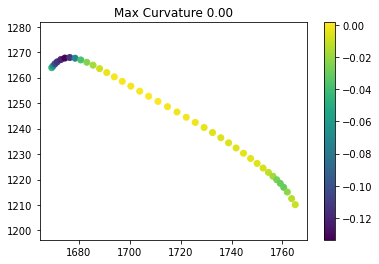

df8dfada99a04a81bd1b102eeb84e9bc
boston-seaport


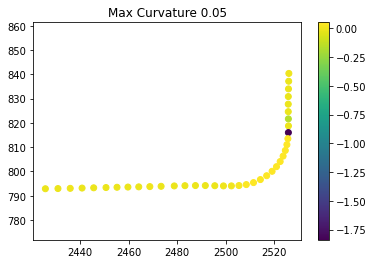

75a4ec12042542149b0a77a0a10d6330
boston-seaport


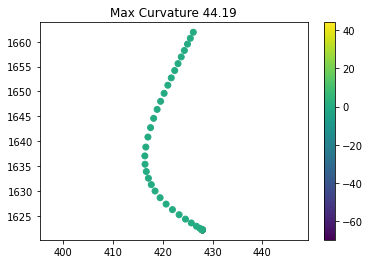

0053e9c440a94c1b84bd9c4223efc4b0
boston-seaport


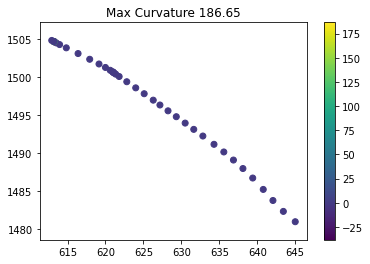

5674c9e612cc4f7793330a361755830a
boston-seaport


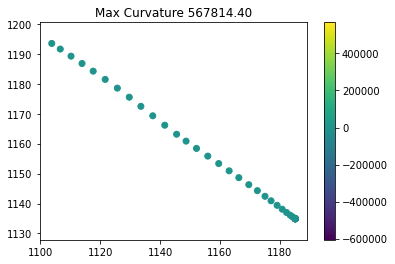

69ee276c40644ddbb7fe21c613cd7689
boston-seaport


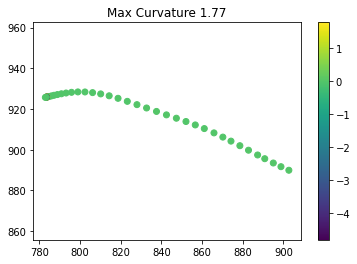

af128e79b77a4a4b8bfcd997c320b2a9
singapore-onenorth


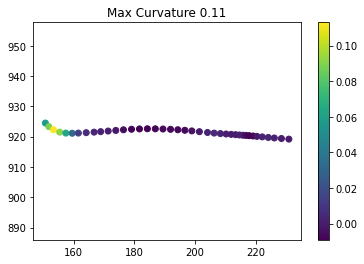

2dc89e0f9c6c4dbab908d341fab020c6
singapore-onenorth


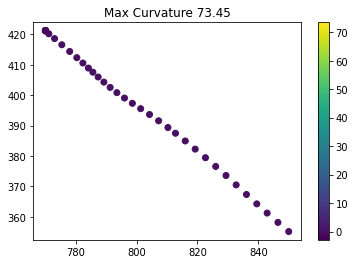

2911b04ae82a45f386ad4f79457dd73f
boston-seaport


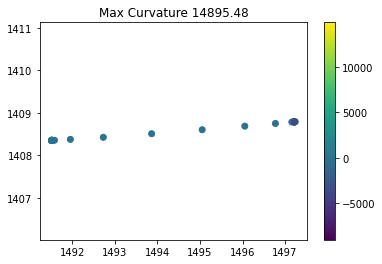

d3c39710e9da42f48b605824ce2a1927
singapore-hollandvillage


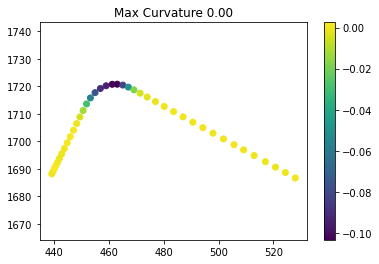

f29904c2bcdc4d78bbcac75a2b30fe38
boston-seaport


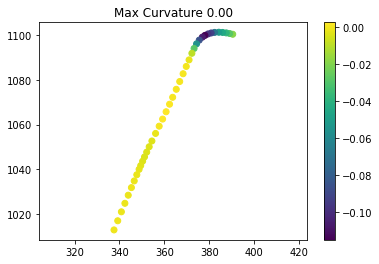

c3e0e9f6ee8d4170a3d22a6179f1ca3a
singapore-onenorth


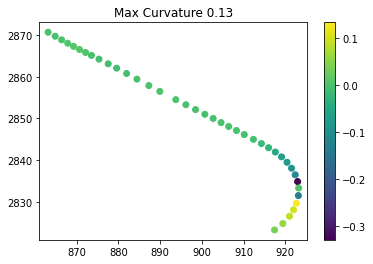

e71f69d57d944b6cb0ffc516a88b6104
singapore-queenstown


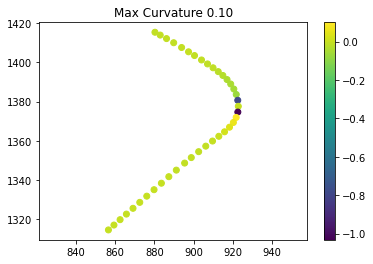

f444b757d7e2444c889da10f02b73491
singapore-onenorth


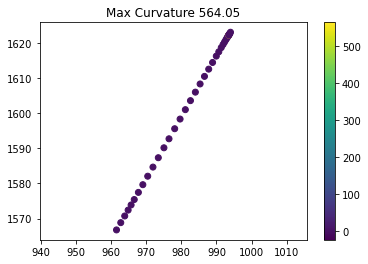

727214583a2a478094d4f093d20c7060
boston-seaport


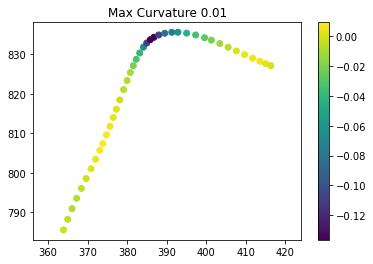

5890face846e47a899246159b7c30bd7
boston-seaport


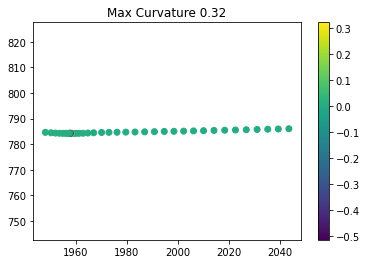

a8819942e8bb43b6a832c56dfb78cfc6
boston-seaport


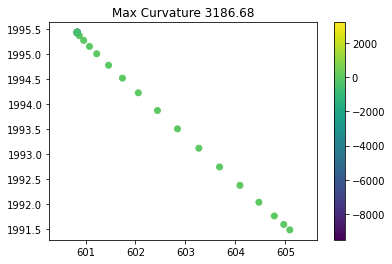

36349e9caeff483e9d8d25e9743b9f5b
singapore-hollandvillage


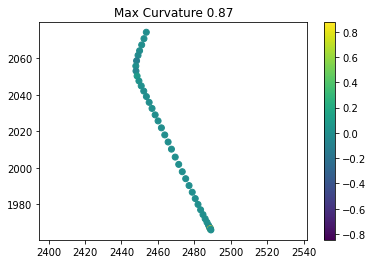

8c84164e752a4ab69d039a07c898f7af
singapore-hollandvillage


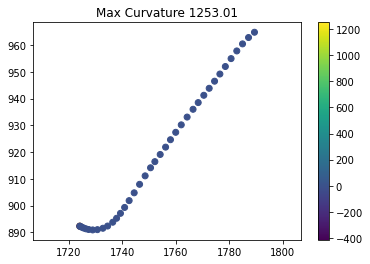

5b9c64f03f8b4a4f8189a18d74f866c2
boston-seaport


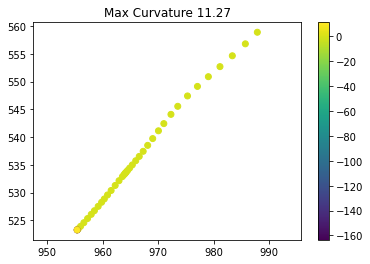

4efbf4c0b77f467385fc2e19da45c989
singapore-onenorth


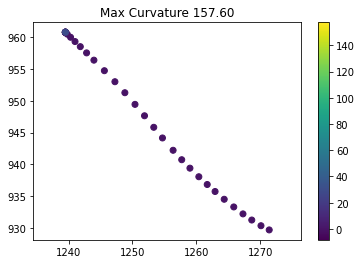

3f90afe9f7dc49399347ae1626502aed
boston-seaport


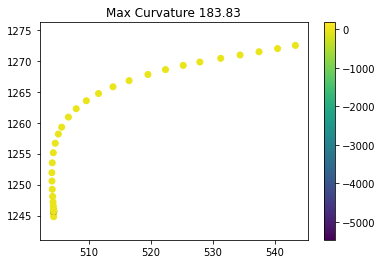

4d475873416a4860900f5af213e0027c
singapore-onenorth


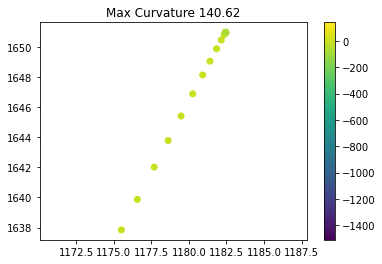

53e8446852bf488bb1b09ae032918bbd
boston-seaport


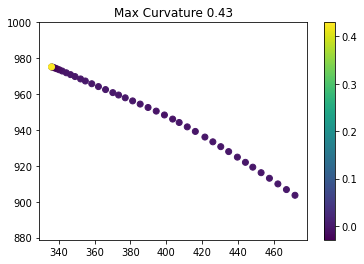

36fbee38a28543ea9e27a67d64e1dee4
singapore-onenorth


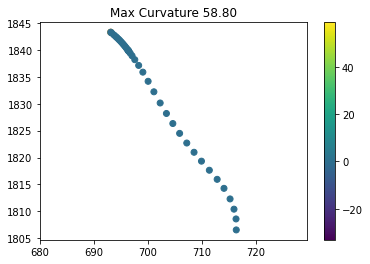

2538a745a83f430eb590d48b4743e179
singapore-queenstown


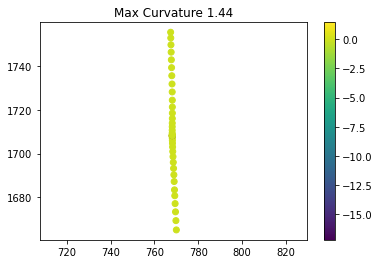

d7ebcbbd26d849b384c11bec8df28a9b
singapore-onenorth


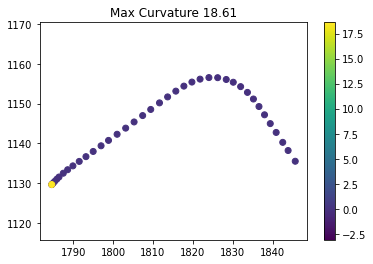

ab6eea0e06c84f70be411a9d36636a7a
boston-seaport


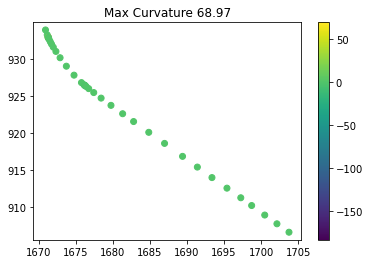

ed22649f50454a6ab71356780b2a2454
boston-seaport


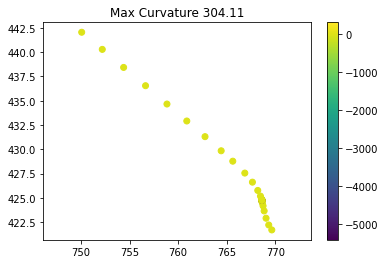

82240fd6d5ba4375815f8a7fa1561361
boston-seaport


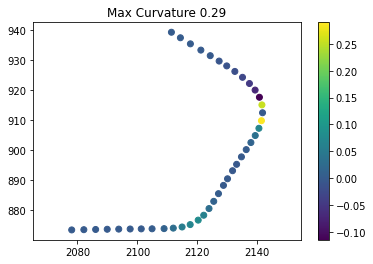

ae643c14ded14e6ea74f8c8605200ed1
boston-seaport


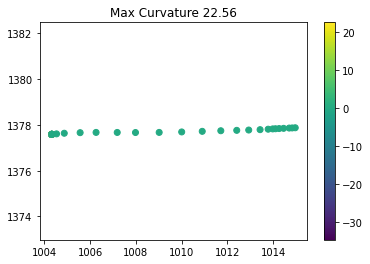

49eb09ab4c4142268131125d6e619a0c
boston-seaport


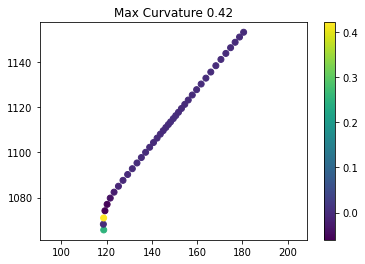

ef5f216134a94e308697ab4c75402a20
singapore-onenorth


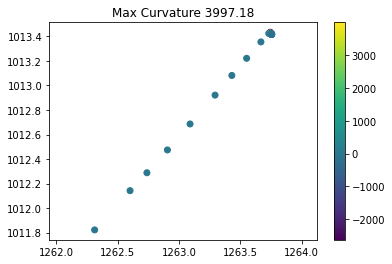

656bb27689dc4e9b8e4559e3f6a7e534
boston-seaport


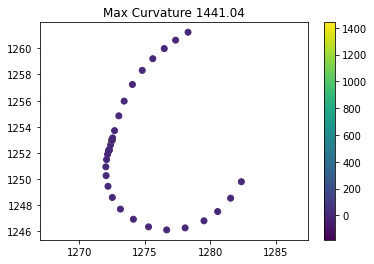

b886756c3fd641eeba9dda3932e196c0
singapore-queenstown


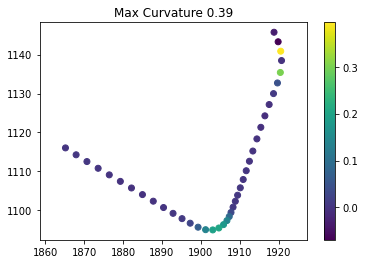

fe4fdd7a28754baeac7074ad78f55a52
singapore-hollandvillage


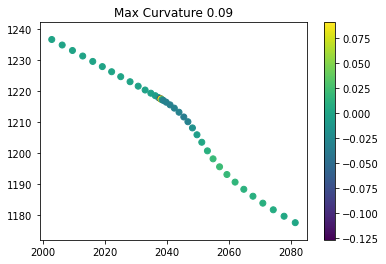

991d65cab952449a821deb32e971ff19
boston-seaport


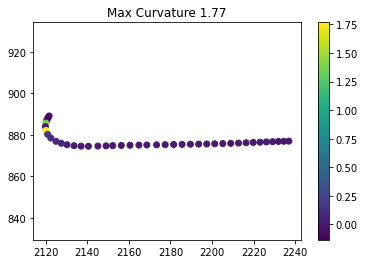

b0c4f9a7680142d8add66f69e5f20ecb
boston-seaport


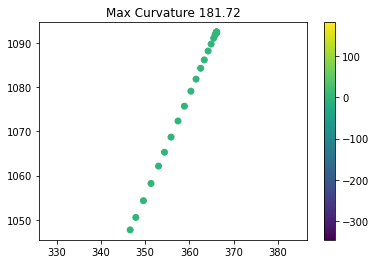

798e8504b4364d378270333a349ef508
singapore-onenorth


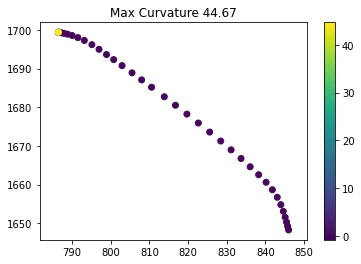

cd1a8954ff904333bb13fa1a6ee526fd
singapore-onenorth


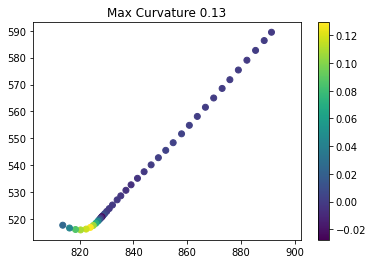

38b3010304734913bb148d17ebbc352b
boston-seaport


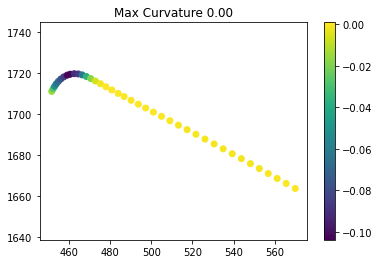

ddb615d9bb22484cabc6545b632a1025
boston-seaport


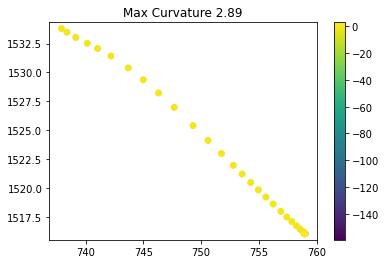

22daa579e9d54040b3f76a4eeef3a587
boston-seaport


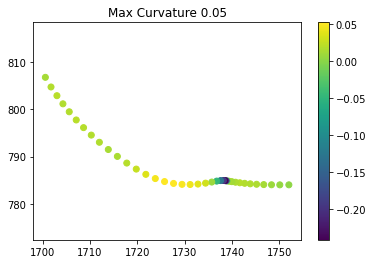

5eaff323af5b4df4b864dbd433aeb75c
boston-seaport


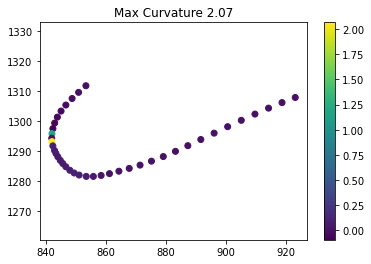

9047b53fd41540649dce014a128cbe1b
singapore-onenorth


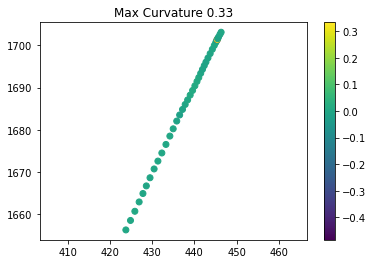

5aa5225d0ef440519a31c1dde075dab7
boston-seaport


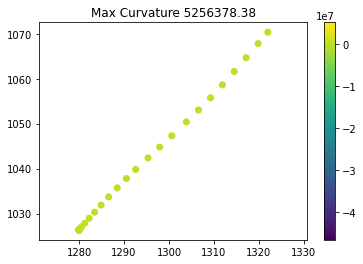

2cc8ffb250c44b42a888e9185810e04c
boston-seaport


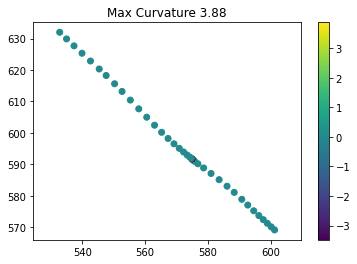

82024d9f5f7f46dba436cd93c27173c7
boston-seaport


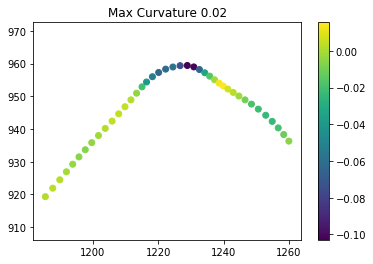

1e9283d1ce98428aaa3b851487eb4f58
boston-seaport


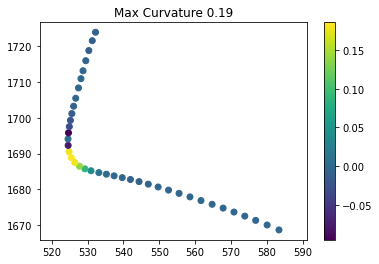

e036014a715945aa965f4ec24e8639c9
singapore-queenstown


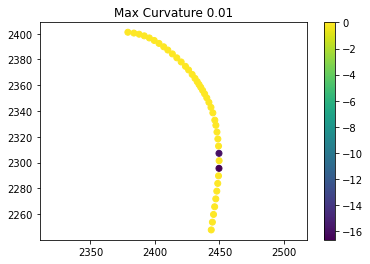

102b894332464704900264216480a8f7
singapore-hollandvillage


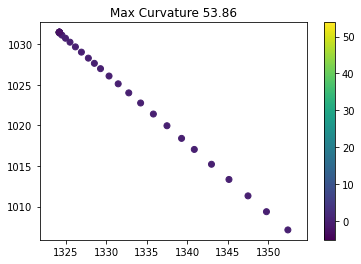

28e4134bcd664522907277f1ceec2893
boston-seaport


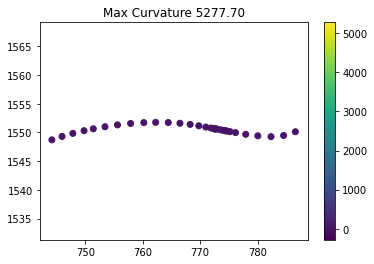

c0990deaa8954a54afc86f7710f349a1
singapore-queenstown


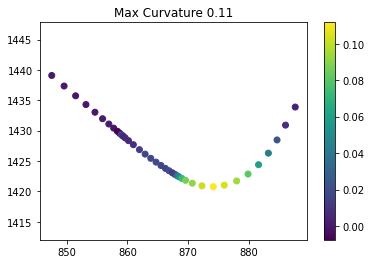

7e2d9f38f8eb409ea57b3864bb4ed098
boston-seaport


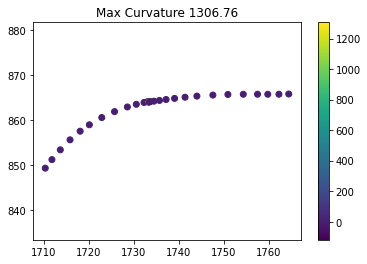

8e1f7ff7dc9940da8eeca3c06ae1aa4d
boston-seaport


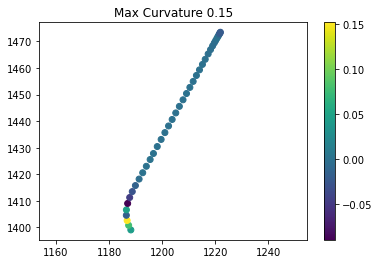

54f56f80350b4c07af598ee87cf3886a
boston-seaport


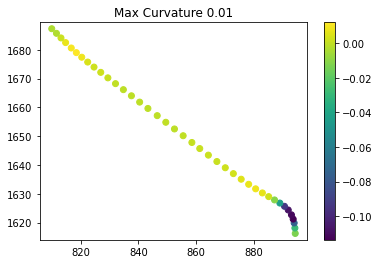

efa5c96f05594f41a2498eb9f2e7ad99
singapore-onenorth


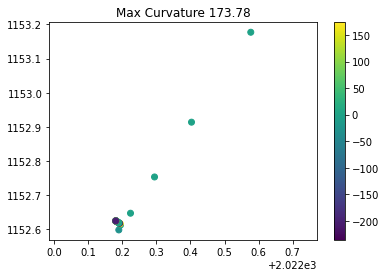

7bd098ac88cb4221addd19202a7ea5de
boston-seaport


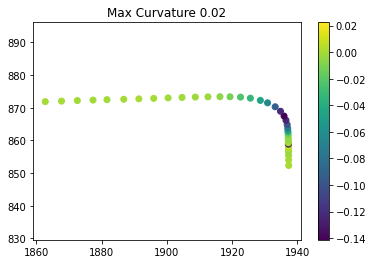

6207269cb9474c14b01f9610b2ee30aa
boston-seaport


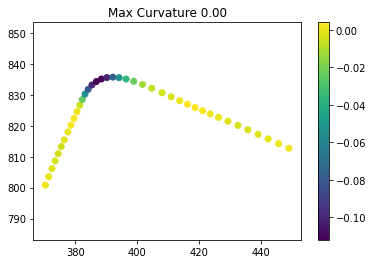

ea9d0ef295c14dafb5653ede3f9f29a1
boston-seaport


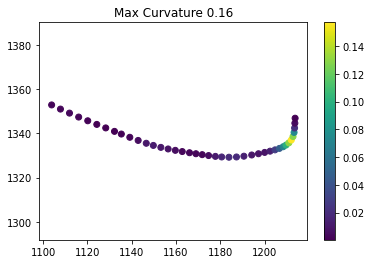

76ceedbcc6a54b158eba9945a160a7bc
singapore-queenstown


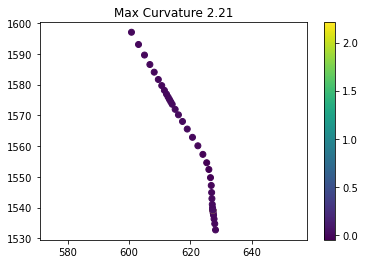

c24317a5c0cb4f5c9fd31740eb1152f2
singapore-onenorth


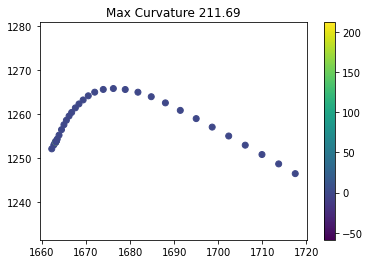

d654cae175de44319ace178994ed0329
boston-seaport


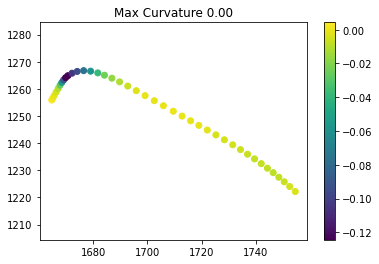

a8bd4c1efe284a5bba46f59454764965
boston-seaport


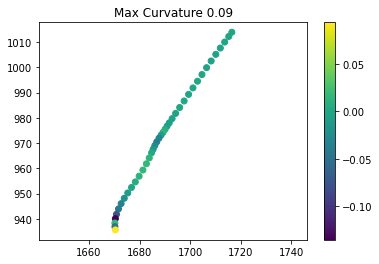

2e3c0f308fcf4664bf7994053d7080b9
boston-seaport


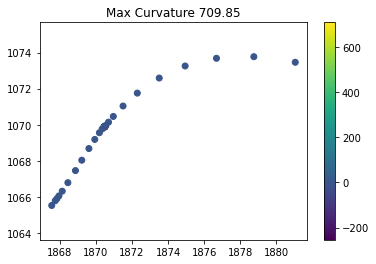

fbf27198b3424e28ab1de2a12eb3dc4a
boston-seaport


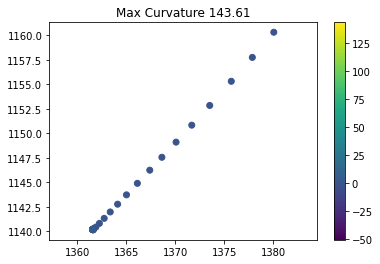

66134aebdaca4aca82aec91ec8c6245e
boston-seaport


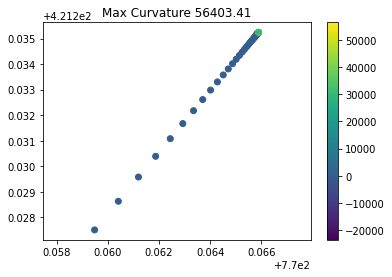

373bf99c103d4464a7b963a83523fbcb
boston-seaport


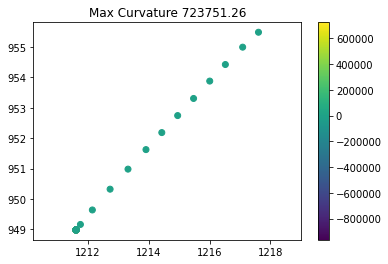

70e7d95ee1d1426fa84da44ddbf82d7a
boston-seaport


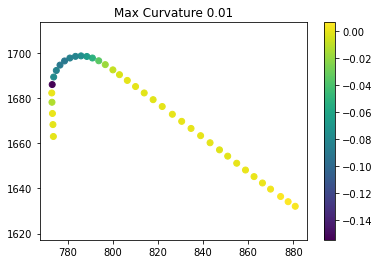

9a81caa3d5134d7f87ee4786ccef68f7
singapore-onenorth


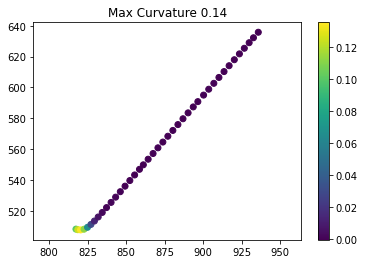

73b16c26a0d24c7a841e4cbe5d0d7878
boston-seaport


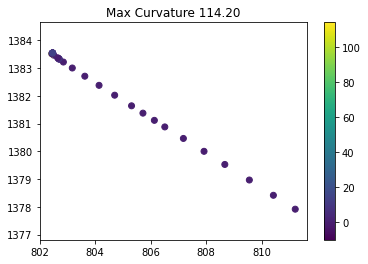

52678e6091214431bf9f3b41e5eeaa24
boston-seaport


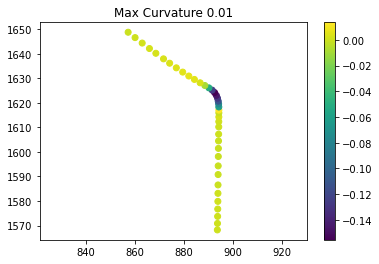

bc219c0fa63b43b4b9dddab47fce1fef
singapore-onenorth


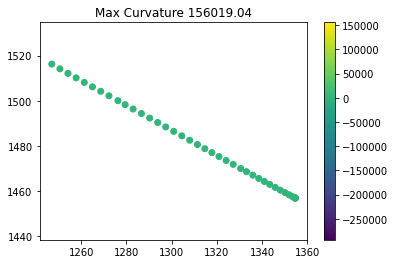

d58468c6097c425e89671a7b3f480acf
boston-seaport


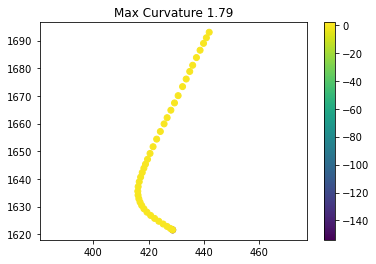

53d4c9a634df4fdfadf057d3a216e98f
boston-seaport


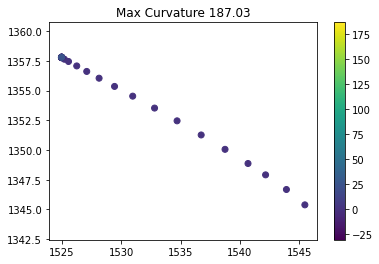

ee909cb746e44174be804f26bc971efe
boston-seaport


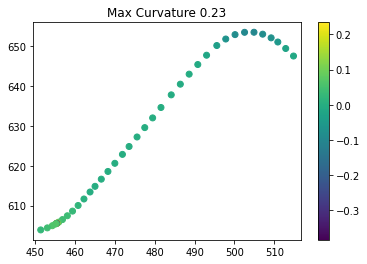

08be42eb2186411d8e2201225329f1c6
boston-seaport


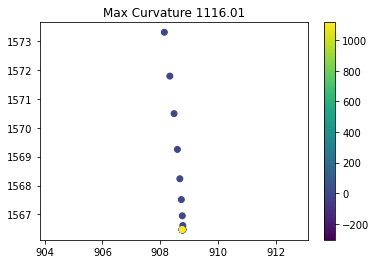

75548269eb0a4614a6f84ab8d7713196
singapore-onenorth


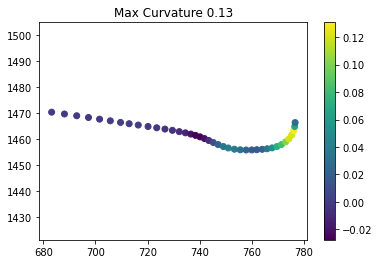

7deb4760e2244f32b57f9d631b535b66
singapore-onenorth


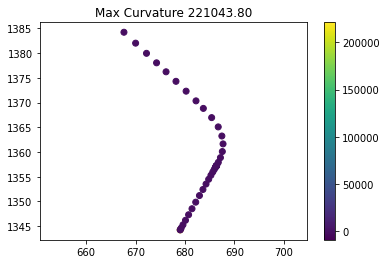

d7823d64ca1a47c5842beb6d7197042d
boston-seaport


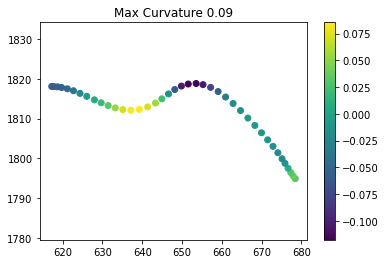

c7b8d96173bf41dc8df8c0d16adfc71e
singapore-queenstown


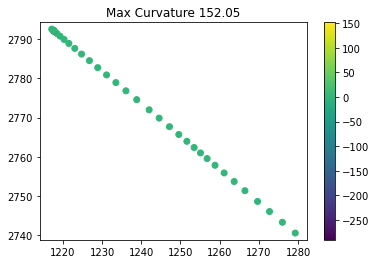

16be583c31a2403caa6c158bb55ae616
singapore-hollandvillage


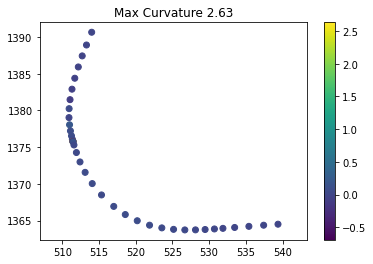

acc29386502047339e1ec6b9c7e512d2
singapore-onenorth


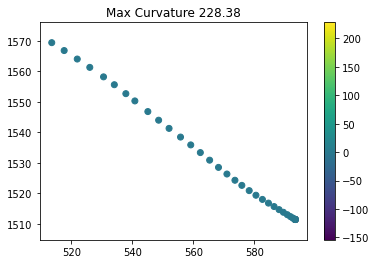

01452fbfbf4543af8acdfd3e8a1ee806
boston-seaport


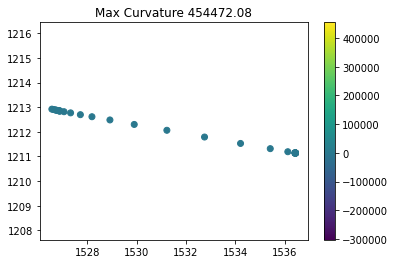

1be49200788d4e38ae4496b27b233ccb
singapore-hollandvillage


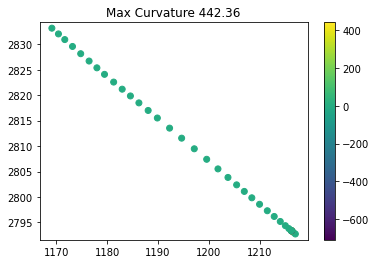

e8834785d9ff4783a5950281a4579943
singapore-hollandvillage


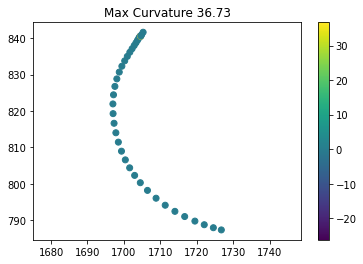

9056ac9944e846109b00e31cc96259cb
boston-seaport


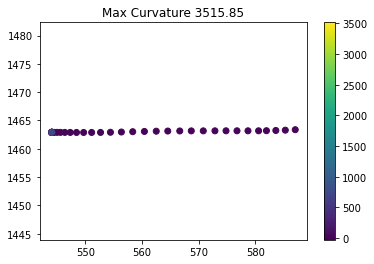

2ce2df158372461fa91ce77455656f81
singapore-onenorth


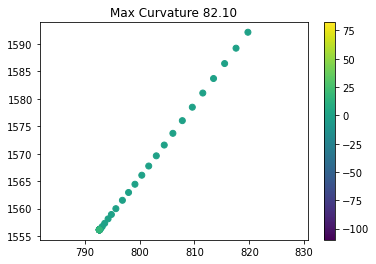

c6072dd4f7cc47efaad77889aa465ad6
singapore-queenstown


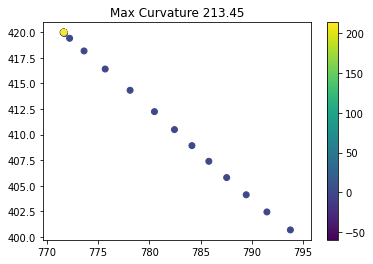

8c45a7a9142f4f848d463cc46843db71
boston-seaport


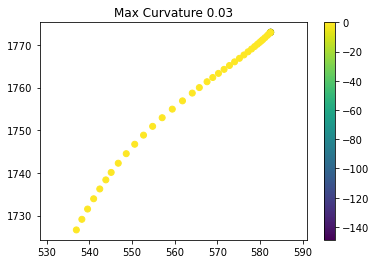

c9c28de6e66442f7921858f1ebbec3ef
singapore-queenstown


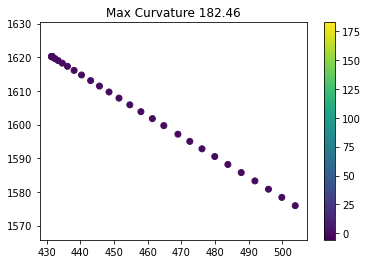

5c2fc0a595c9435cb08e30700c63f9e9
boston-seaport


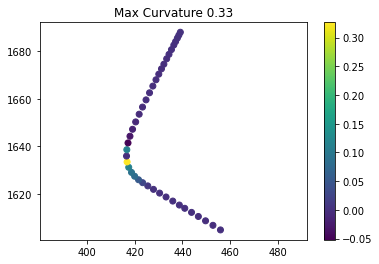

8b60e7e47cde43e0a7fbd66d926de14f
boston-seaport


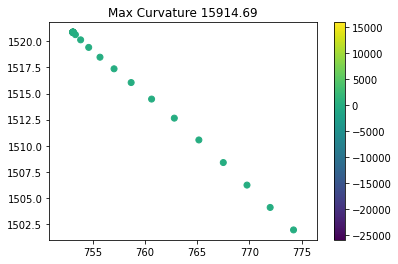

d9a3087bab26405cb005221b979edd39
boston-seaport


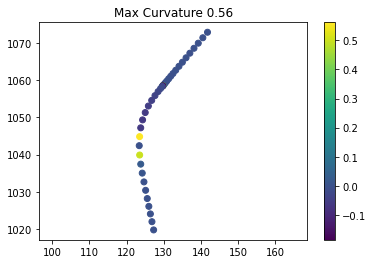

212b65c558254e2084489bf76e371e1a
singapore-onenorth


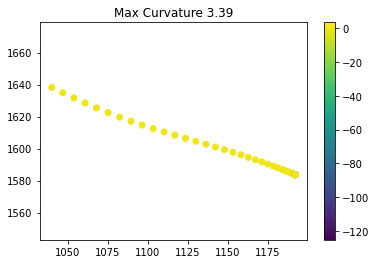

f98a50e675b14266a6c53cb25a0351fa
singapore-hollandvillage


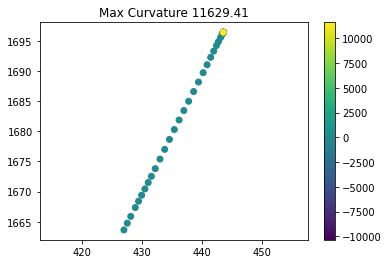

fb3aaad97849430cbc32891319c9be10
boston-seaport


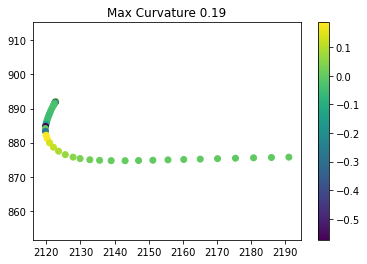

78c5f7d7b547483c906d8524a8c3190f
boston-seaport


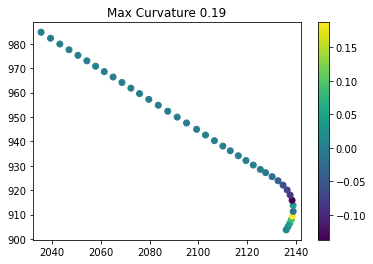

a5d7cc4bf3404cccb89932d94ccb9da6
boston-seaport


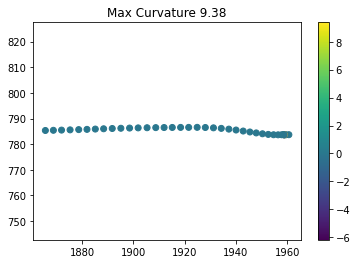

93481c2504474ca0b21d4abbab2cf3cf
boston-seaport


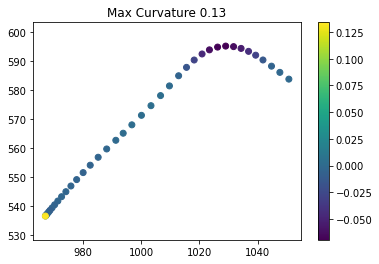

359f9c029ae44e1d9d47c05bc7915561
singapore-onenorth


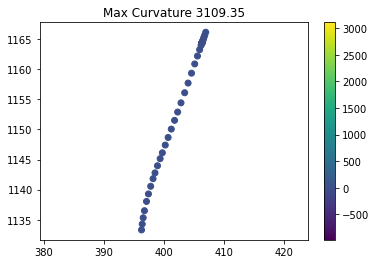

c0d3796765e2452d990309b2568adac5
singapore-onenorth


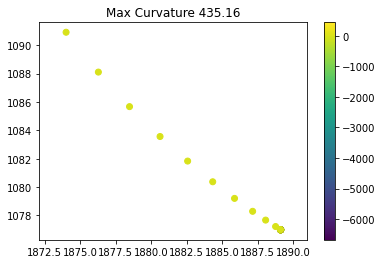

1959c8f440a340fda3ea2cac0ac528ec
boston-seaport


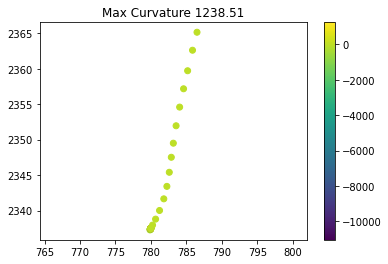

d9161e521b1644cea4cb9e3f21ef9f79
singapore-queenstown


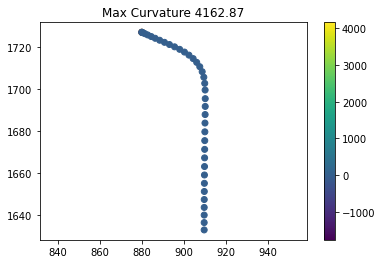

1d4db80d13f342aba4881b38099bc4b7
singapore-onenorth


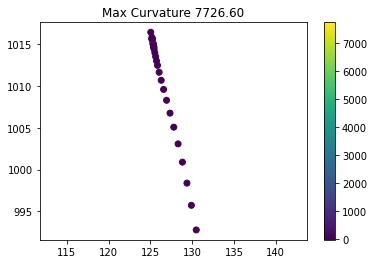

a4bfab3710d4494aa3c9a443c1bf5573
singapore-onenorth


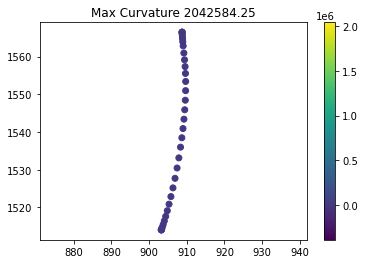

02e484442a2f411b971edcf96ebbe885
singapore-onenorth


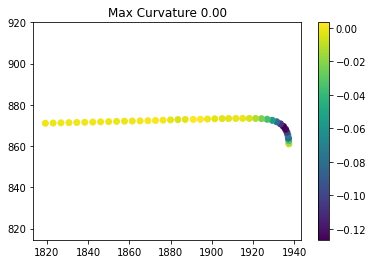

634e7fbfe29c4a72b1ceb692b1d2ab44
boston-seaport


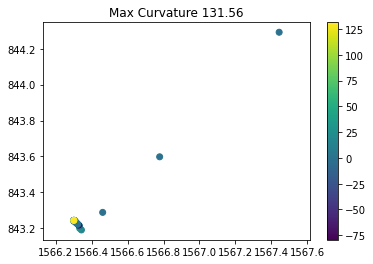

0287702725184161af95373198546a59
boston-seaport


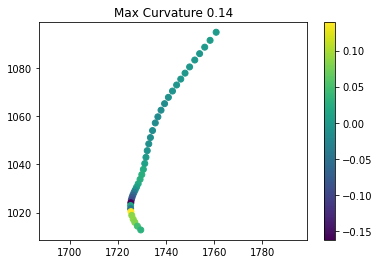

860ef56791a947baadb27dd00bd5d4b3
boston-seaport


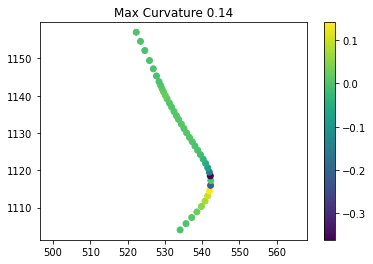

93036f2be8de445aad06b727b848cea5
singapore-onenorth


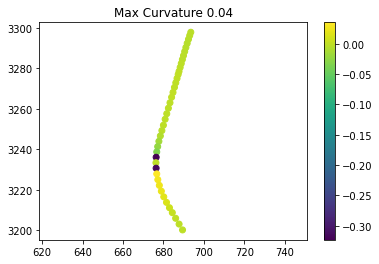

ca6abd081eaf48689f06b5e8fcc9d369
singapore-queenstown


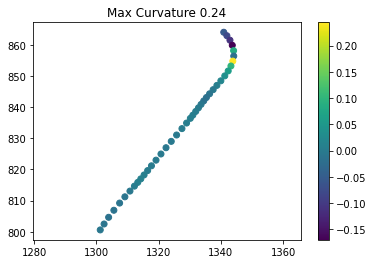

d95a36c034344ae2ac11daf2ba1b2c60
boston-seaport


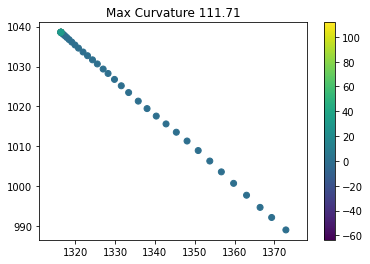

d1ece215e0a8442691cb5e380a6fb935
boston-seaport


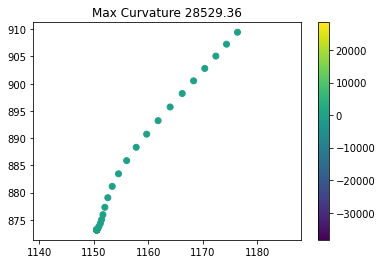

5560a973257e407b8d5bf9fb92b1e0f3
boston-seaport


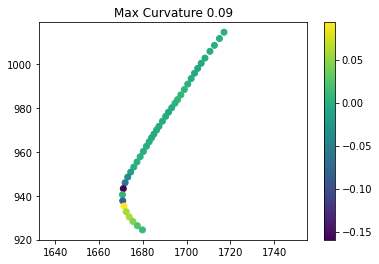

97349fd50e694a5f994b0954047b96d0
boston-seaport


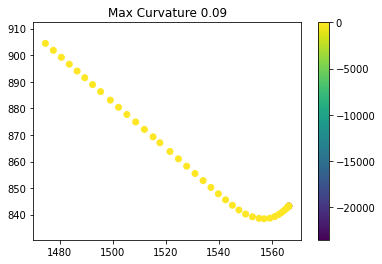

590b4e5a4f94426ab3b1a66f35e140d5
boston-seaport


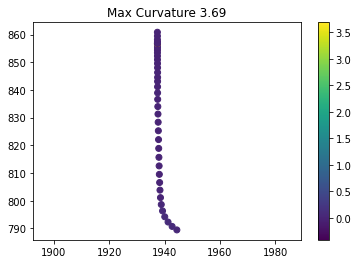

96a410b8fe5e4b57bf69b844bfd4d28c
boston-seaport


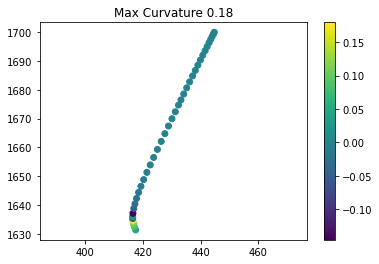

35ecd252b8ee4cbc83376148e192a803
boston-seaport


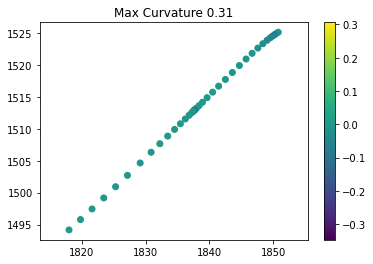

01796494e25c448dadaba70cfcc3532d
singapore-queenstown


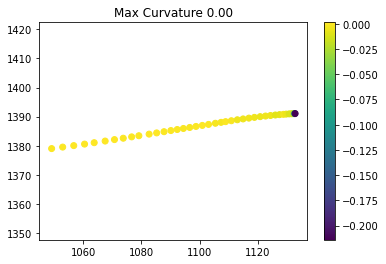

9a0d2af517ff44f587c93254ee657215
boston-seaport


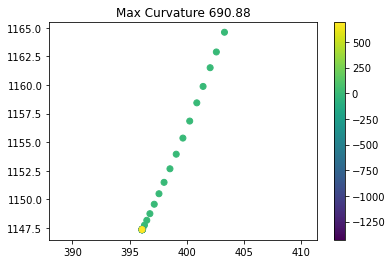

2422d2652f4f42298a389a6e0dfef307
singapore-onenorth


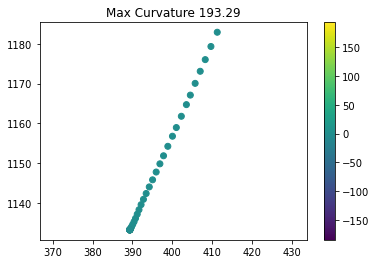

8377abf77f464a9cb62eacf63f383422
singapore-onenorth


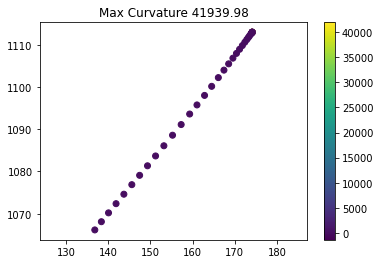

dc6235e2281943548084c484cb38b876
singapore-onenorth


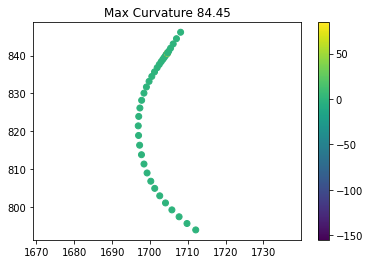

53c92676ef334011bd4689494ac11fa0
boston-seaport


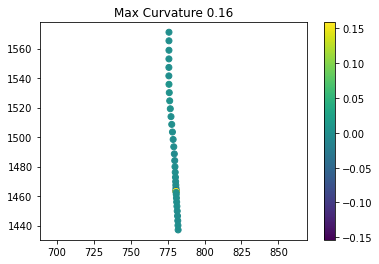

0e37d4a357db4246a908cfd97d17efc6
singapore-onenorth


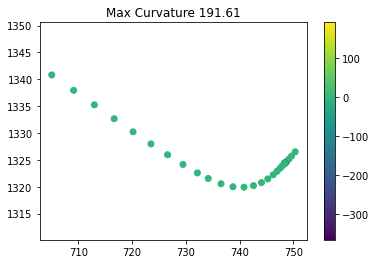

d0b2d916178a402a842c88f394d7d7e8
singapore-onenorth


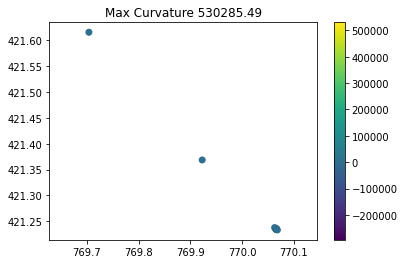

9c7062b34e064d6ab42124f3f0be233d
boston-seaport


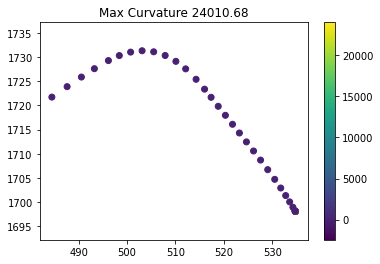

080a52cb8f59489b9cddc7b721808088
singapore-onenorth


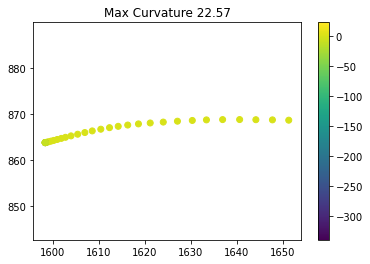

4959ccdac5774a088d0c9e10667f09f1
boston-seaport


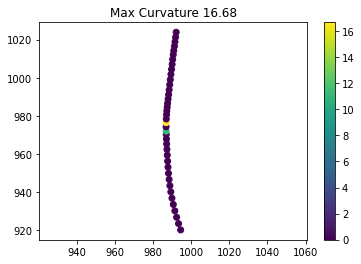

813213458a214a39a1d1fc77fa52fa34
singapore-onenorth


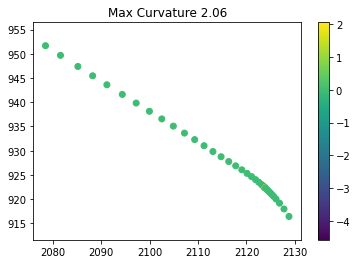

c7492bdc08f8450fa580b7787331f0c9
boston-seaport


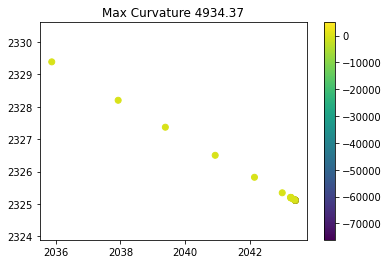

905cfed4f0fc46679e8df8890cca4141
singapore-queenstown


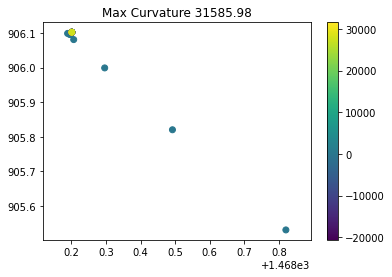

b0be2e24e2234947867c7f555f6f59d2
boston-seaport


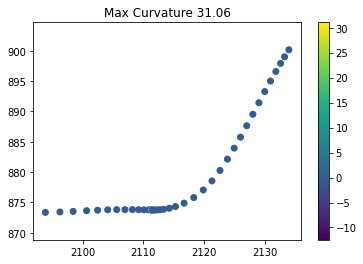

cf3db17f34cd412faca3535ac8c7069a
boston-seaport


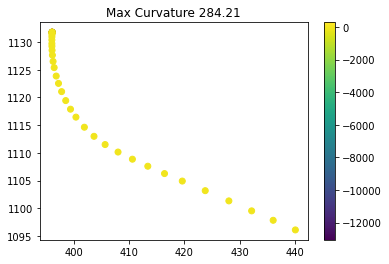

73d9a36f20594e658020ebfc5b0ba74a
singapore-onenorth


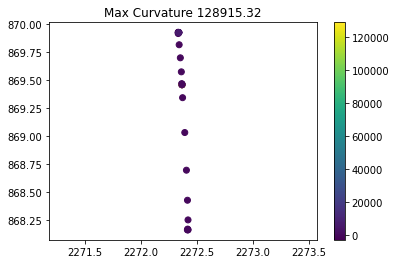

bc8f2774ff4946d3965a807a6aa1b64f
boston-seaport


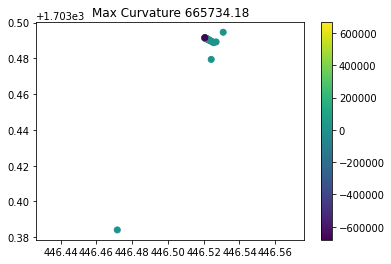

555c691be4704ef29559373e031441dd
boston-seaport


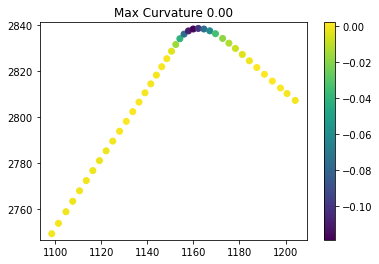

295c6c85275e4376bc8446b4a76504cd
singapore-hollandvillage


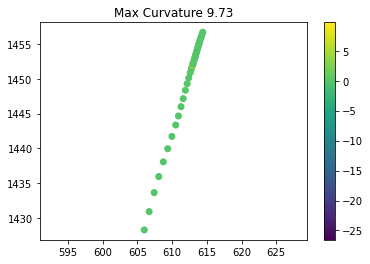

8461c1125eaf46c7abaf4ee18e8c4ee6
singapore-onenorth


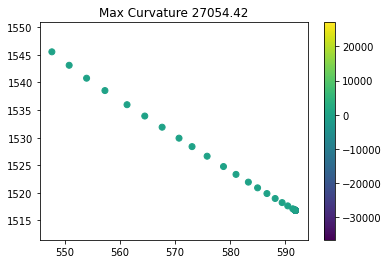

cab845a2e8864482993ac62811f879c1
boston-seaport


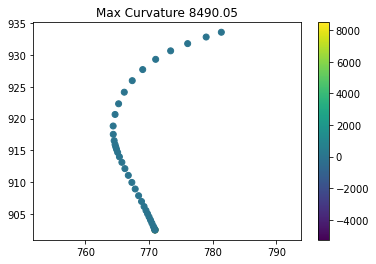

792b78f6cbcf413c821cb591630cddfb
singapore-onenorth


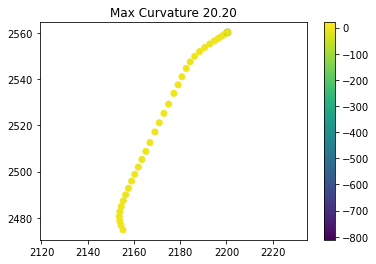

e6f1a7e6218a4737bfedc6af90926b3e
singapore-hollandvillage


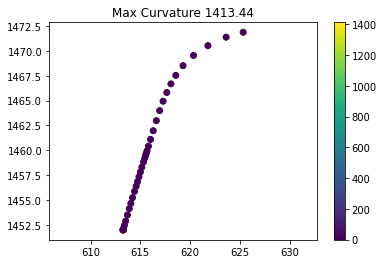

03ee880dd4e348f4b3407f0d073c7c70
singapore-onenorth


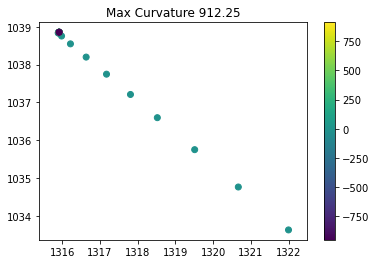

5ab815cbcfee494499e41151890d6d8f
boston-seaport


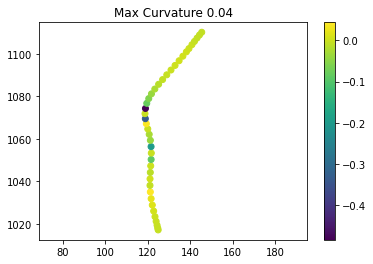

7f6043918b234b68a61e6caab7a33346
singapore-onenorth


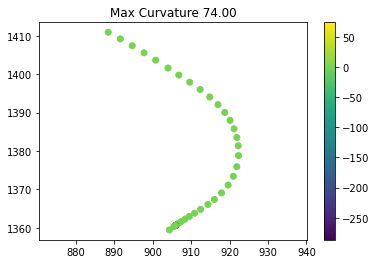

5a2aac9df32945d183fc81924ff148b6
singapore-onenorth


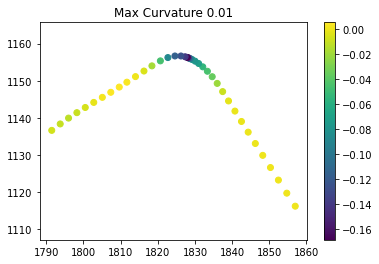

e757a98aa8794d448f65f5966b8ac954
boston-seaport


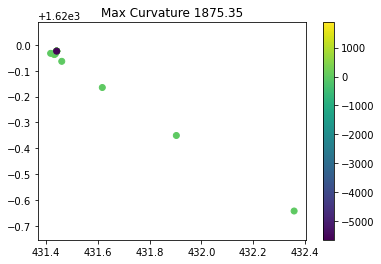

36b7b02f0f034f0595e3437a85554151
boston-seaport


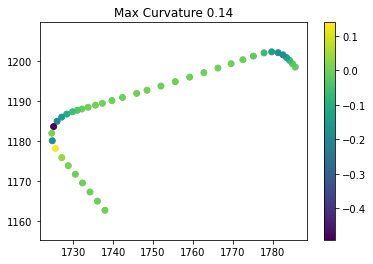

980ddcb62e294608bd4235b0dfd517f4
singapore-hollandvillage


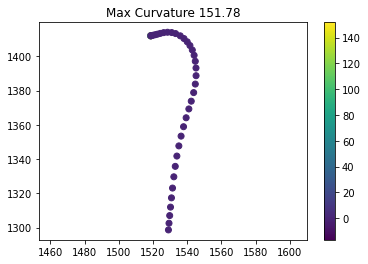

57146b2ebf10432f84b15a3038fe1755
singapore-hollandvillage


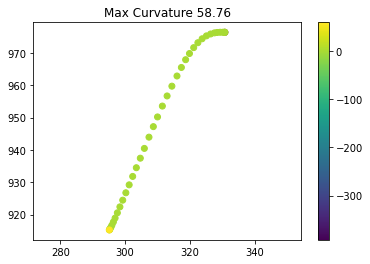

b68cfa7e0bd64bd395fd922d750cfdd2
singapore-onenorth


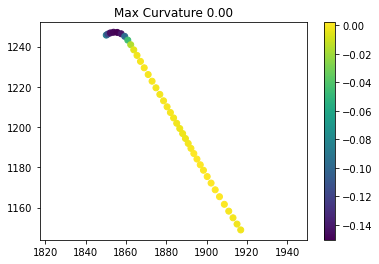

f143809fc26c4bb296f4f367b0954c26
singapore-hollandvillage


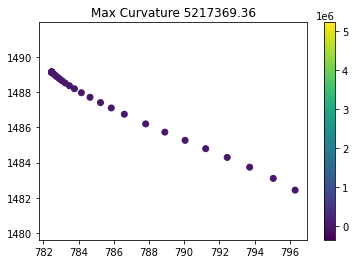

d865cb18632040fdb4cb06b6e3331cdb
boston-seaport


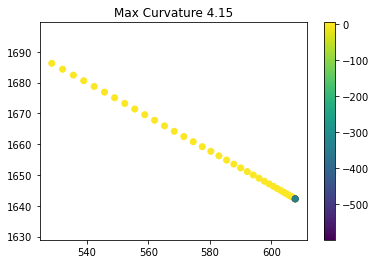

c7780850596641b8ab5f352d16b178e4
boston-seaport


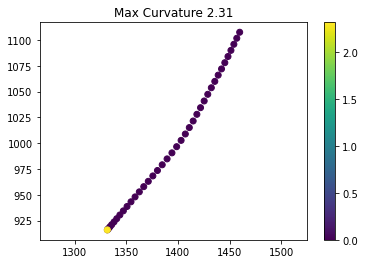

a2b64d02c5fa4b9bab671a97561b6b33
singapore-hollandvillage


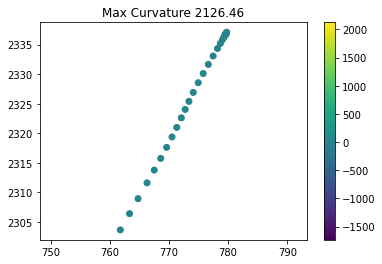

797700339b014fb6aa61c1ea3778d587
singapore-queenstown


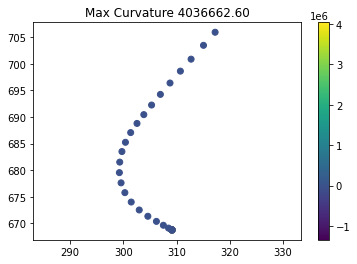

6b80170cd8404e6298d353bf1fa8dc0c
boston-seaport


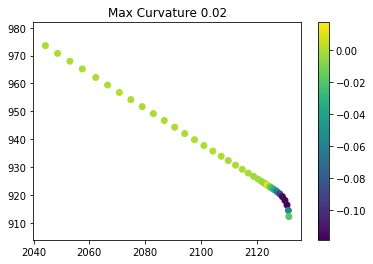

5557f4edc1464442812293e2ea90a586
boston-seaport


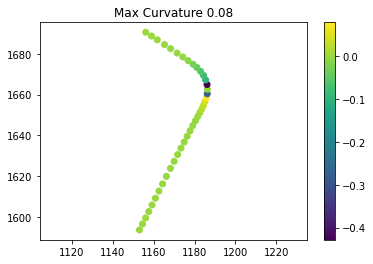

1ec0b9bc3eca4b76b2610c519f843762
boston-seaport


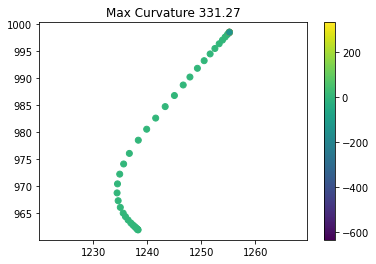

952cb0bcd89b4ca4b904cdcbbf595523
boston-seaport


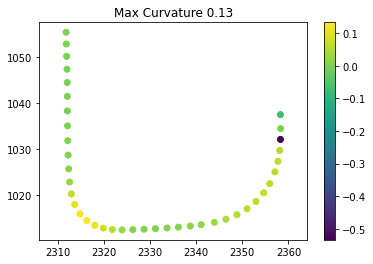

b789de07180846cc972118ee6d1fb027
boston-seaport


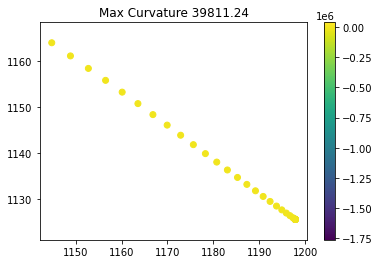

2eb4d7f00e584a548aa0b899638bfb0a
boston-seaport


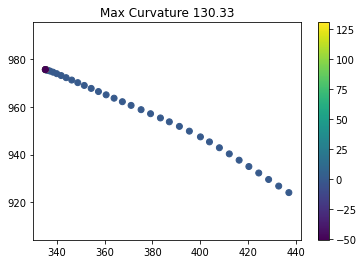

17302a41218442ffbb0b094adb0669ab
singapore-onenorth


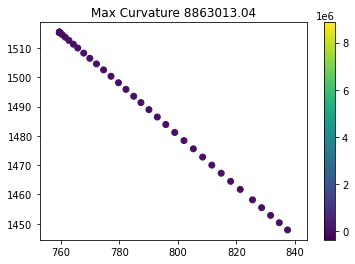

40516b7f46e548d19dfee580e9a5afa6
boston-seaport


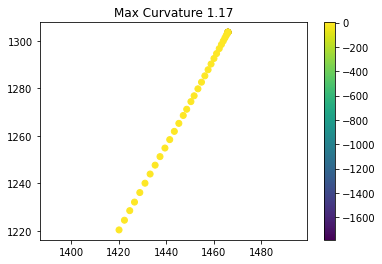

d01e7279da2649ef896dc42f6b9ee7ab
boston-seaport


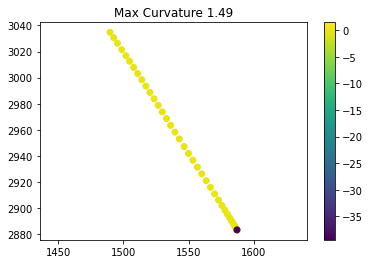

19284973bd0342998c37848e931a90d0
singapore-queenstown


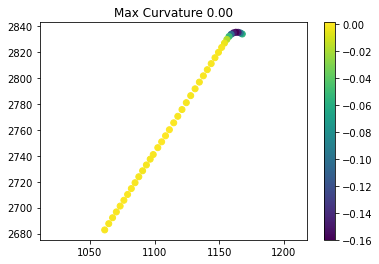

d29527ec841045d18d04a933e7a0afd2
singapore-hollandvillage


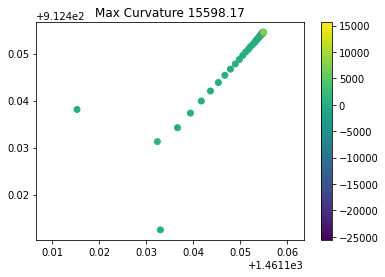

7ad327c8827849ed91136bb2d04acec9
boston-seaport


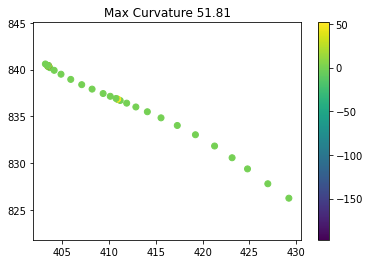

b7bb8ec5bf22476f8ba8ca0b2e57e8f6
boston-seaport


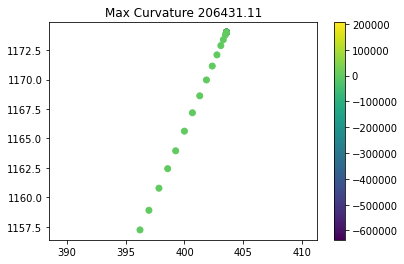

2f093cad7209436aa06e103bfe062857
singapore-onenorth


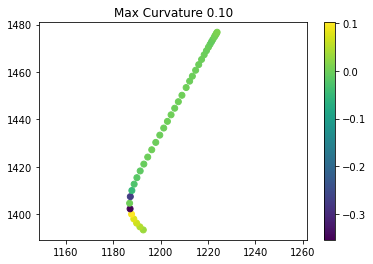

66461d94f2e44d39a90843ff2dce11e8
boston-seaport


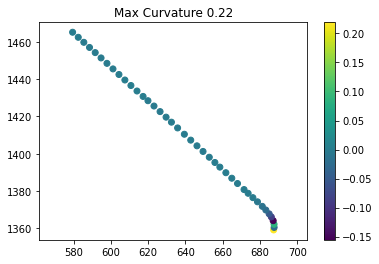

3a2d9bf6115f40898005d1c1df2b7282
boston-seaport


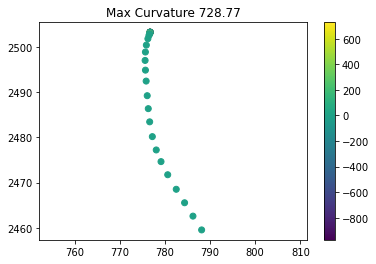

242ac1b59fec4e0c9c200ffca81775e2
singapore-queenstown


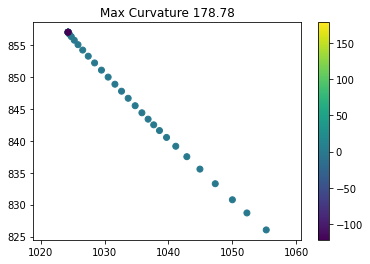

c04cdbbe744c4da08d3df61c47d5cc94
singapore-onenorth


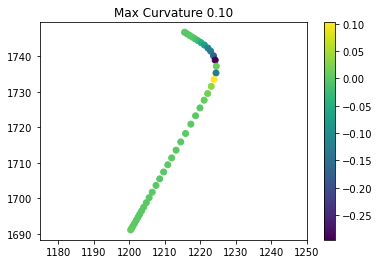

20ec831deb0f44e397497198cbe5a97c
boston-seaport


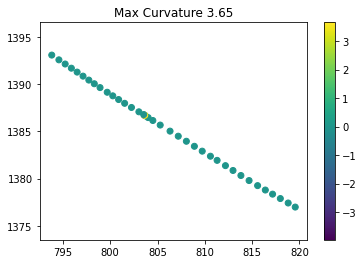

b8be4950e73743a8841d545fcb145706
boston-seaport


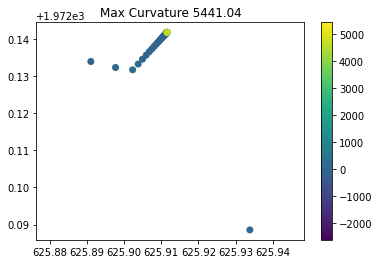

8d8728879b89405eba3f8ce1af138cb2
singapore-hollandvillage


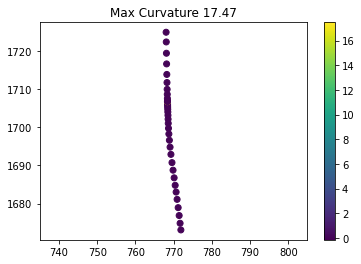

a4fe925930de41489b12b85b77d2f0cb
singapore-onenorth


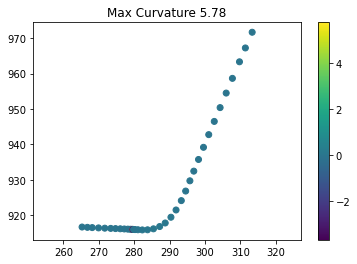

d90b94e8bfd446cd9407f48665122268
singapore-onenorth


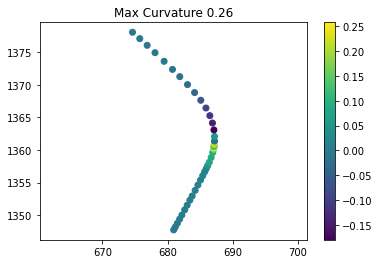

fd2d419d4cf84a2d84922b9b7d2cea4d
boston-seaport


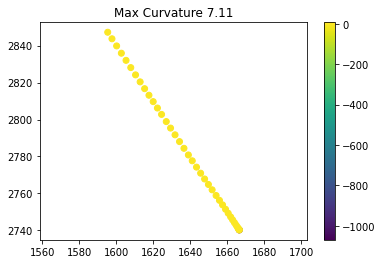

380ff00ec86447e3b986edc8e82ffba7
singapore-queenstown


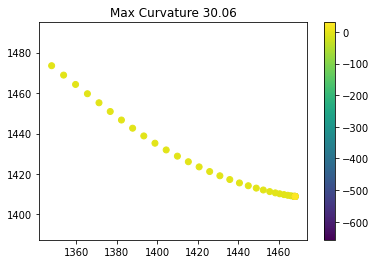

26c089d84086473e87607ae5c6ae85c6
singapore-hollandvillage


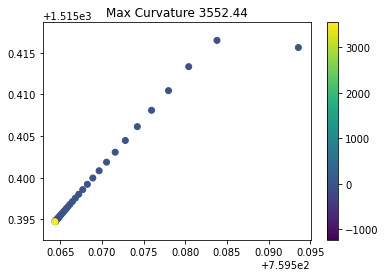

76b36918bd4c487581a4196ffd1b1434
boston-seaport


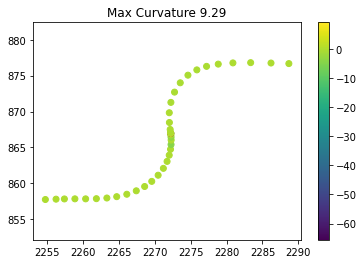

bc4fd5a05a004333b9411754630f4cba
boston-seaport


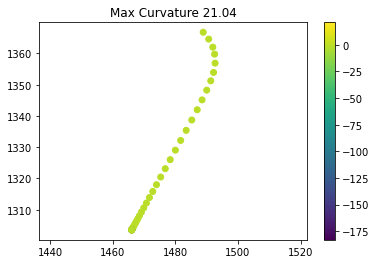

01e4fcbe6e49483293ce45727152b36e
boston-seaport


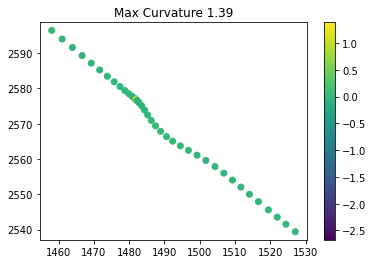

268099669c954f429087081530094337
singapore-hollandvillage


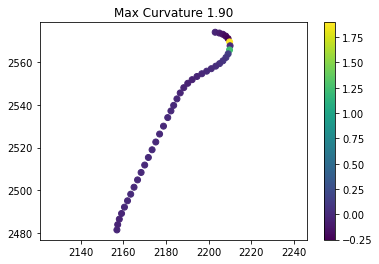

05d5241d4d5a4c2a9c670dc8c9853c74
singapore-hollandvillage


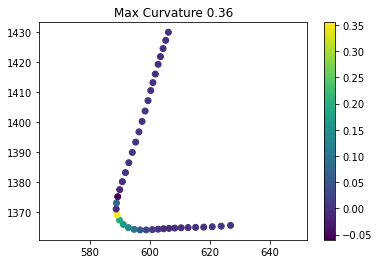

f9e460f092c94466b1211704b5a8859d
singapore-onenorth


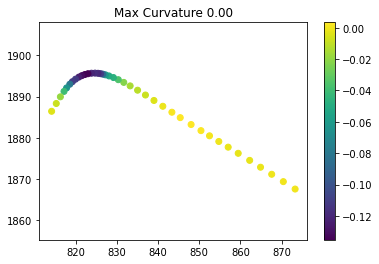

65cfdc10a42e499ea704c617e077afe0
boston-seaport


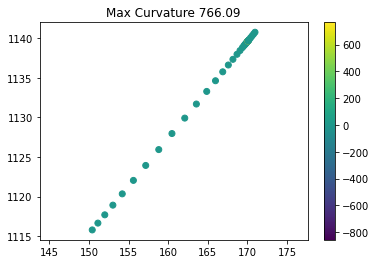

10dfdae842b543938a230f25a1e9f934
singapore-onenorth


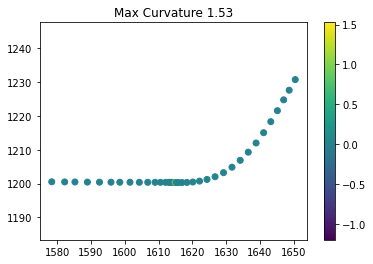

2f9da038274a4448bdbb83f994fc6381
boston-seaport


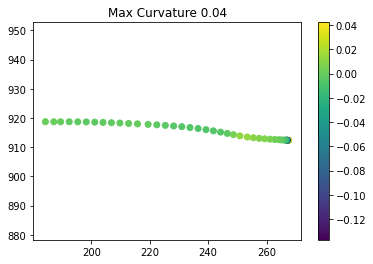

52b30ecd104a4f4eab6f8f5684a73e56
singapore-onenorth


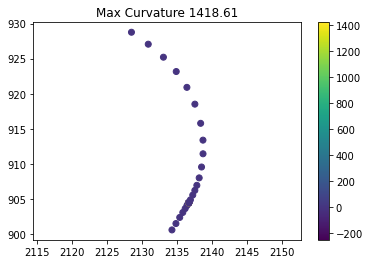

ff6af17f52c34e9c9958c64e41fb3786
boston-seaport


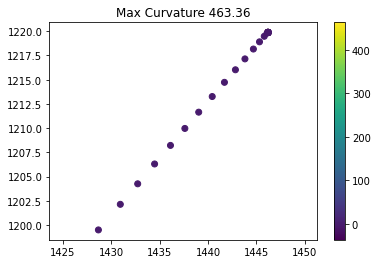

44c9089913db4d4ab839a2fcb35989ed
boston-seaport


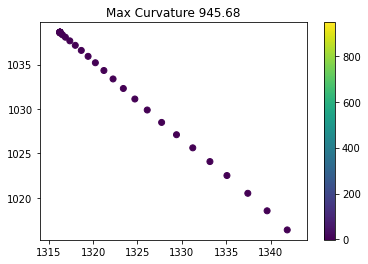

1891b66d9f58463399aa242f3b521232
boston-seaport


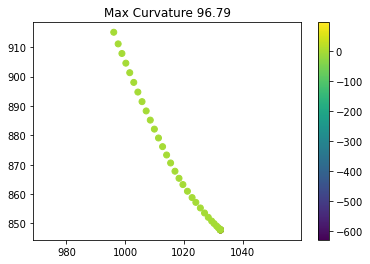

d1e57234fd6a463d963670938f9f556e
singapore-onenorth


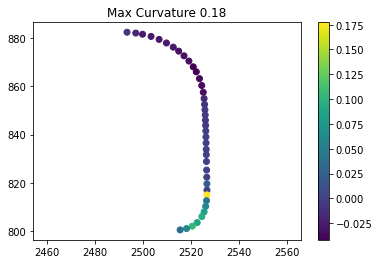

e9a94a93c36a4adb831eb67ec8bdf289
boston-seaport


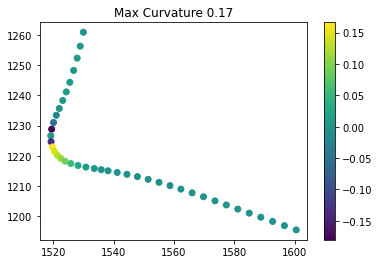

8d267899e2e843d4905fafd1f12c0a20
singapore-hollandvillage


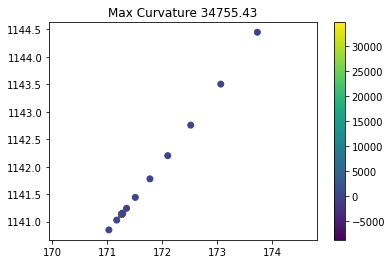

7463b2d752f0464f803b07a945ee7c5a
singapore-onenorth


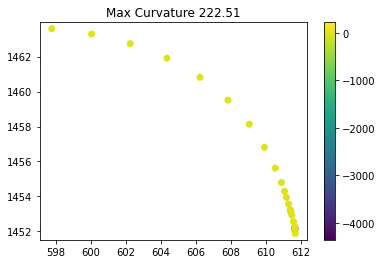

1fa63d31aaa7459383b4414715cd12db
singapore-onenorth


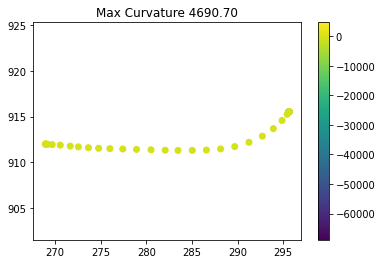

931c5c57011944459bba3825ab8777a9
singapore-onenorth


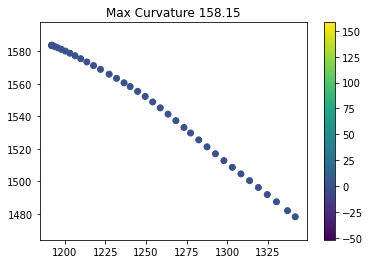

a1e7cd557b9541dbb00822ea0c56204b
singapore-hollandvillage


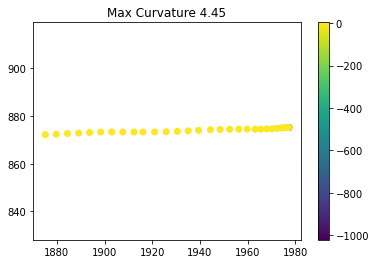

f36162eac28641a0978032ff89e0f752
boston-seaport


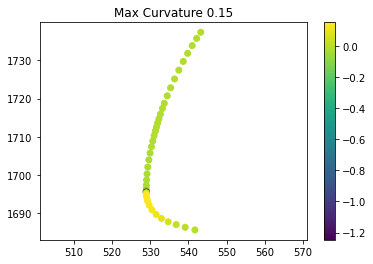

223096a415cc45bf8ecd4c3a42251fd7
singapore-queenstown


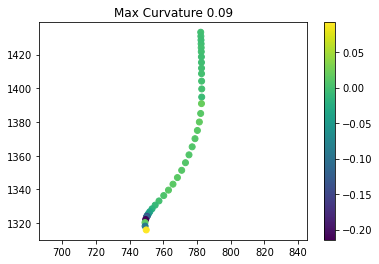

37b32e4e8cf846679b2c0cb342dbd4aa
singapore-onenorth


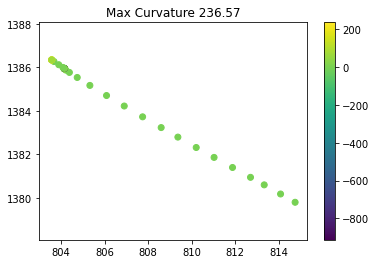

0c13be31e9854d97960d1af570db433f
boston-seaport


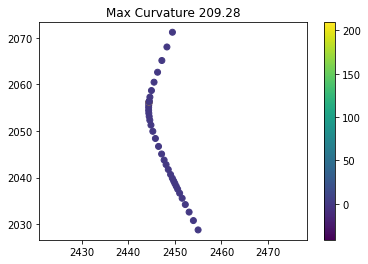

034dee1695304630b0692da8c1f153fc
singapore-hollandvillage


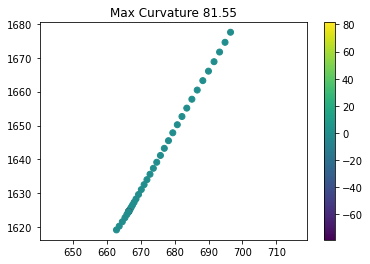

098c11f50ff2425a9ff994e004de1216
boston-seaport


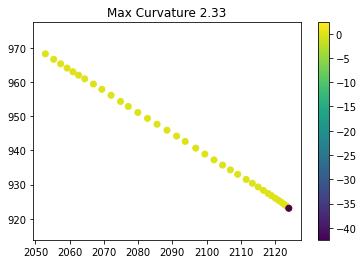

69295e26c8d146de94ea5307d8d74819
boston-seaport


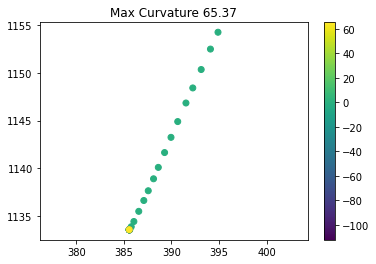

7bcc4753bdb64d2cb407b55cc4e4527f
singapore-onenorth


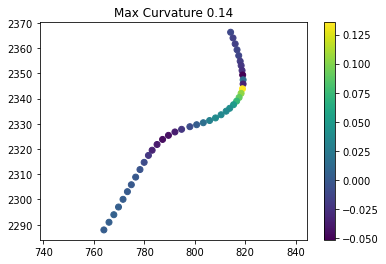

09f67057dd8346388b28f79d9bb1cf04
singapore-queenstown


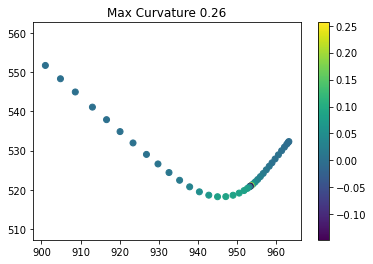

a1b51c02d8414856a86c0c37e4789c2f
singapore-onenorth


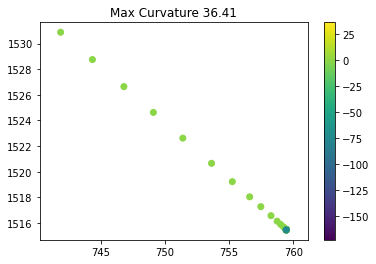

82aa6c89bbf744a6a5a12cc171d8376e
boston-seaport


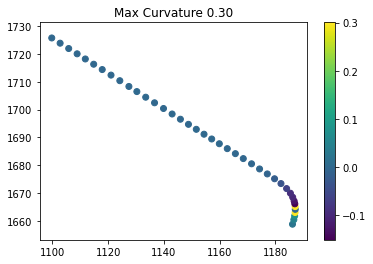

782f9486adbd4546a492e69b6697ef70
boston-seaport


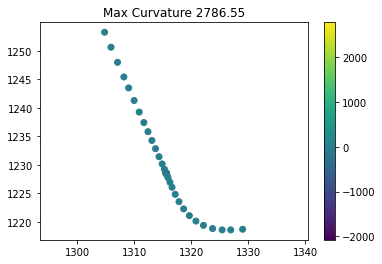

112ca771e318478a88cfa692f61ffcac
singapore-queenstown


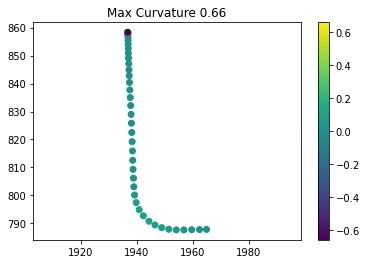

2d8e61ea27fd419ba9b708488e3f2f10
boston-seaport


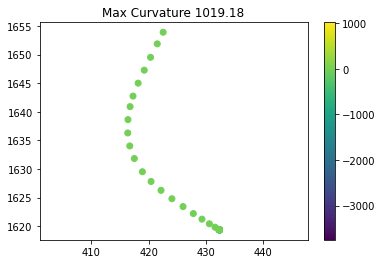

30ae9c1092f6404a9e6aa0589e809780
boston-seaport


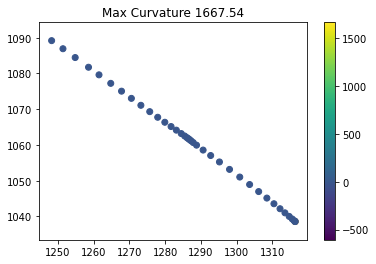

3363f396bb43405fbdd17d65dc123d4e
boston-seaport


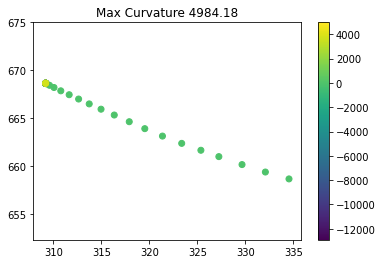

2fc3753772e241f2ab2cd16a784cc680
boston-seaport


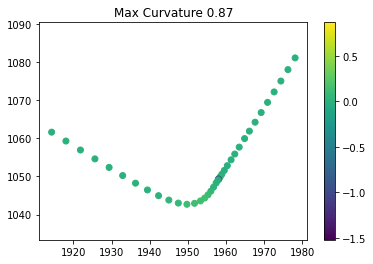

19d97841d6f64eba9f6eb9b6e8c257dc
boston-seaport


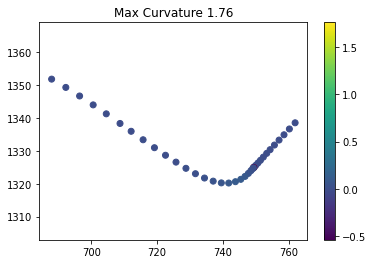

25f40f7316954a3e978e24d691e1a117
singapore-onenorth


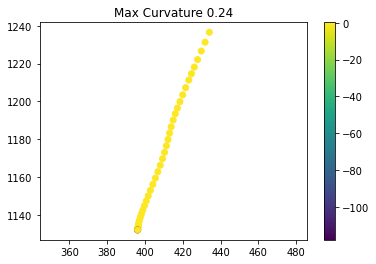

3dd9ad3f963e4f588d75c112cbf07f56
singapore-onenorth


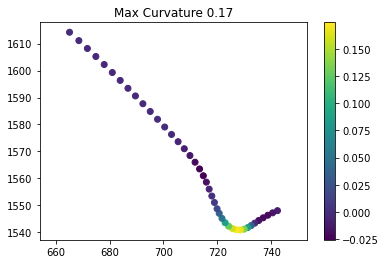

212fd4c9c9174635a7ec76051c8eec9e
singapore-queenstown


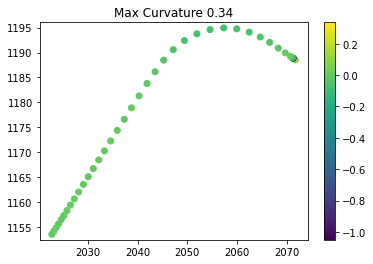

7210f928860043b5a7e0d3dd4b3e80ff
boston-seaport


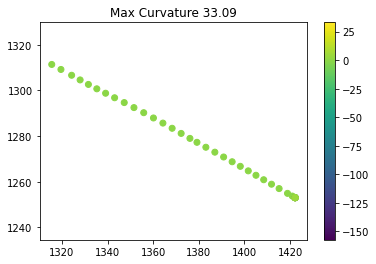

f92422ed4b4e427194a4958ccf15709a
boston-seaport


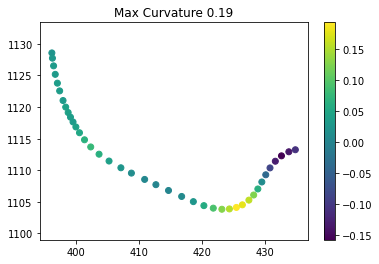

b51869782c0e464b8021eb798609f35f
singapore-onenorth


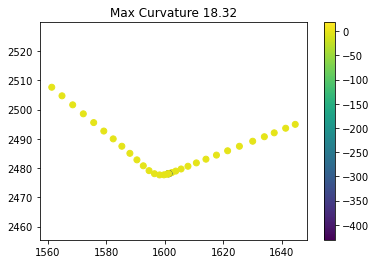

f97bf749746c4c3a8ad9f1c11eab6444
singapore-hollandvillage


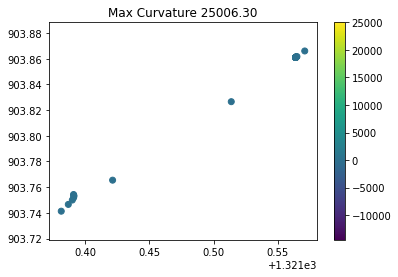

b57e1a48e584451f8f966ab083c8d07d
singapore-hollandvillage


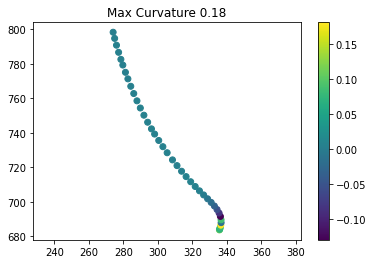

1fbcc26ebf6948bb964d3ae74939e8ea
singapore-onenorth


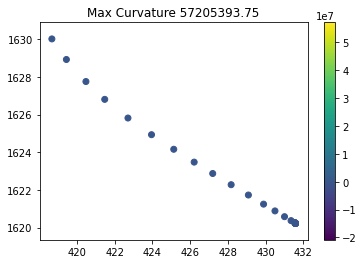

1a819a84e3494177b47bea8c7f0770ec
boston-seaport


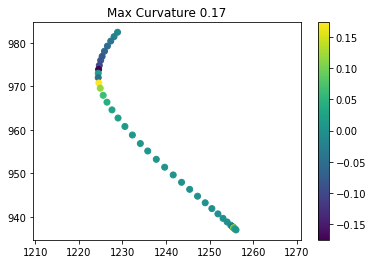

b94fbf78579f4ff5ab5dbd897d5e3199
boston-seaport


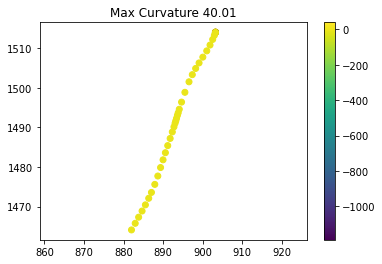

31cb85777b814e0ab6ae6d146964b6ae
singapore-onenorth


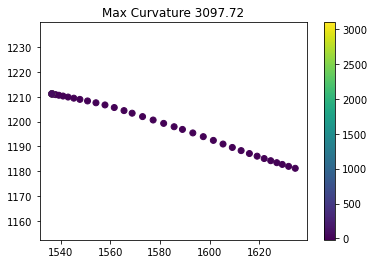

d2db9f5df62c4d338d3bed43f616b954
singapore-hollandvillage


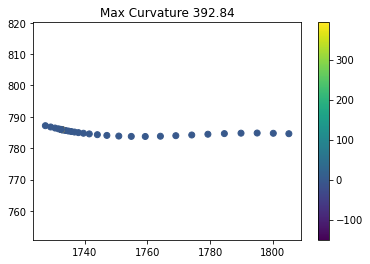

08110c8640454affb5167801442a85fd
boston-seaport


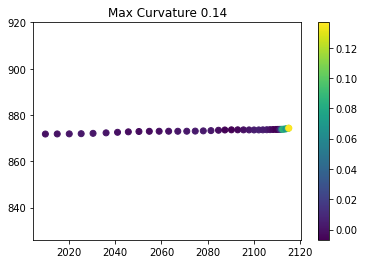

fc61f52dcc1b4def95a278665d23af00
boston-seaport


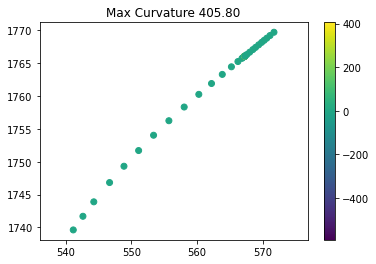

fcb40dc8514444c49b1fdc06f80a123b
singapore-queenstown


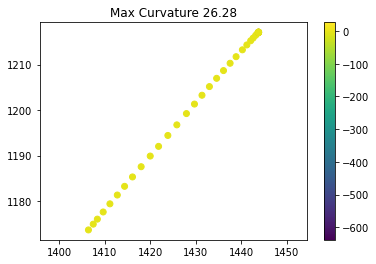

28db6ee9a8d34e9e88e741817b6733c1
boston-seaport


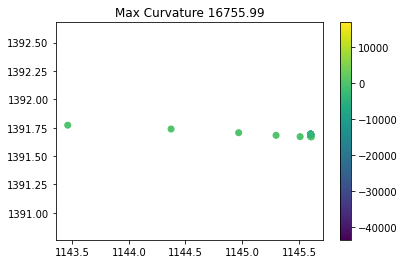

13be0238abba499e95ba4e6404b22223
boston-seaport


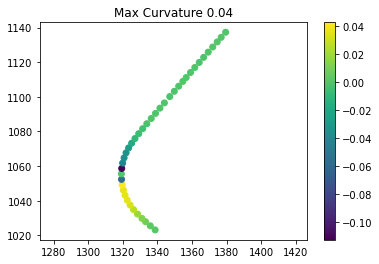

cddd0d5be10b4313a859524952455f43
boston-seaport


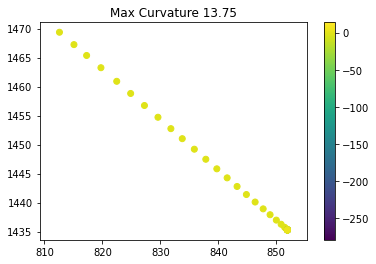

7ca5e90766dc4b7bb6a9b3b0d95c99da
boston-seaport


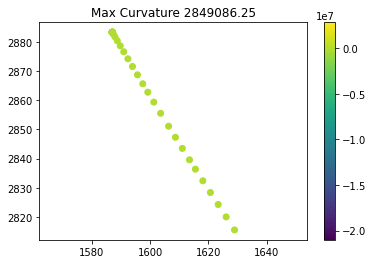

78f63999591a49a195b872ddc368a146
singapore-queenstown


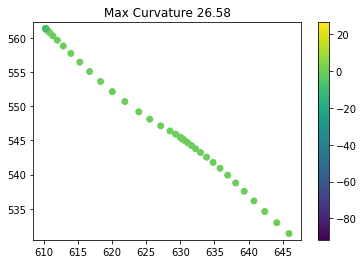

6d6314f1865343f987ca53107b694745
boston-seaport


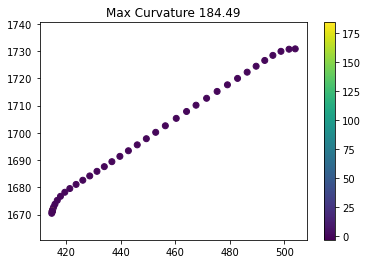

a99120daccb24bcd941b33e6e03bf718
singapore-onenorth


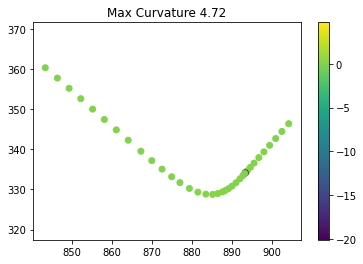

0b8948ee96ac46faad405bf1ffc70bb1
boston-seaport


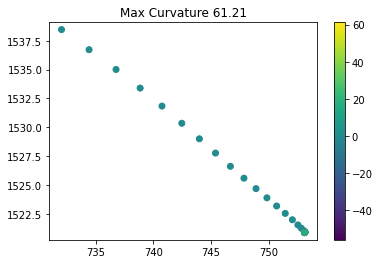

2bbae5e654224cbeb5884c471e2ad05e
boston-seaport


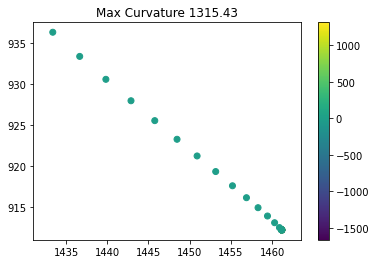

77c23b25e2ee4b9ebff6d179d3ce4a31
boston-seaport


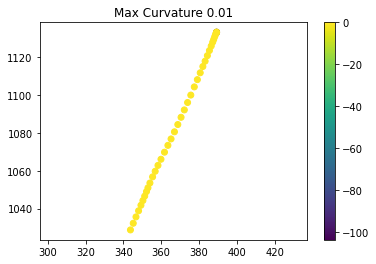

201b7c65a61f4bc1a2333ea90ba9a932
singapore-onenorth


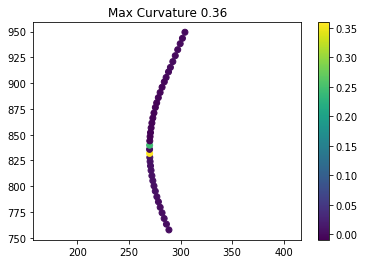

3dd2be428534403ba150a0b60abc6a0a
singapore-onenorth


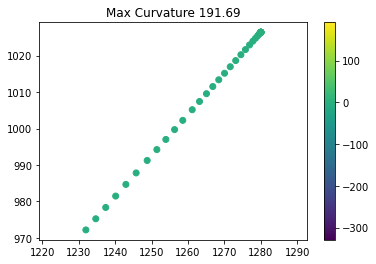

e5a3df5fe95149b5b974af1d14277ea7
boston-seaport


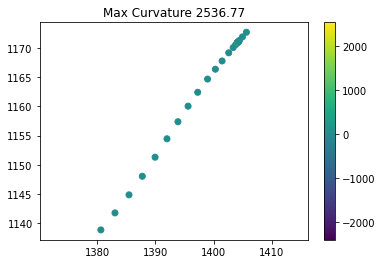

d8a5dd6087de4e808c61c27f91e8216e
boston-seaport


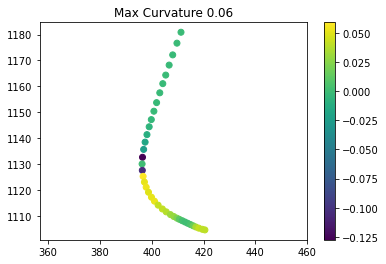

cc8c0bf57f984915a77078b10eb33198
singapore-onenorth


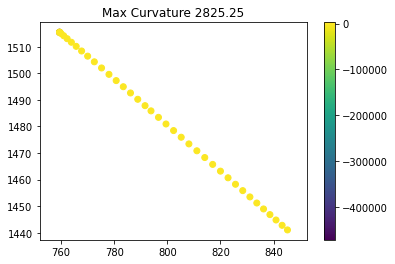

881da81bb35a4bdb925e0a2884ee7f0f
boston-seaport


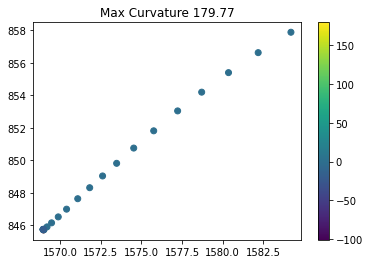

60111bb5388f4195b98555d4d4b89618
boston-seaport


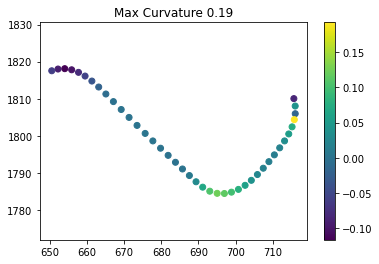

325cef682f064c55a255f2625c533b75
singapore-queenstown


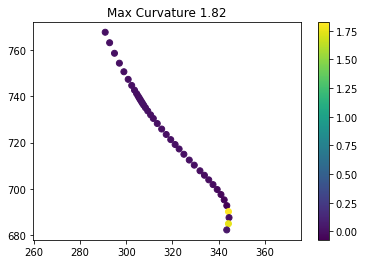

91f797db8fb34ae5b32ba85eecae47c9
singapore-onenorth


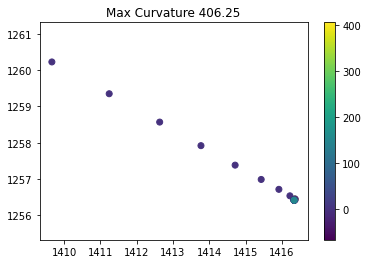

6447a9c30b0140d783871b08104ae7b3
boston-seaport


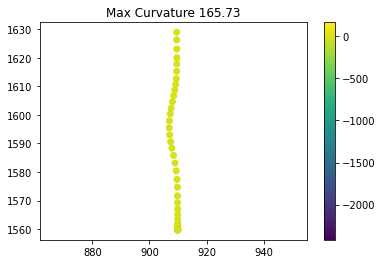

3a1850241080418b88dcee97c7d17ed7
singapore-onenorth


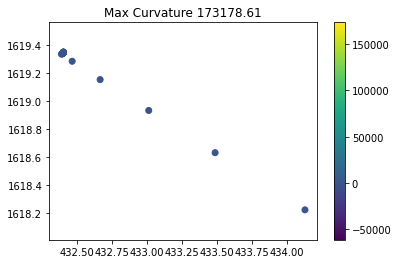

214008f81b8b4b509c730f0c13e9491f
boston-seaport


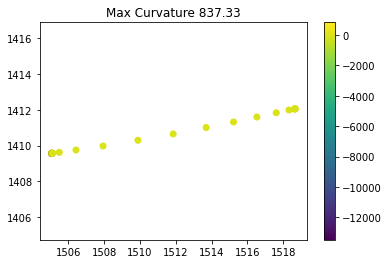

7ed1b613f0ee47ceaf6d19ca3947f825
singapore-hollandvillage


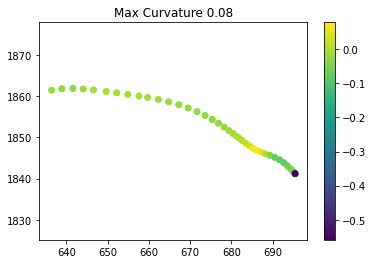

e60ef590e3614187b7800db3e5284e1a
singapore-queenstown


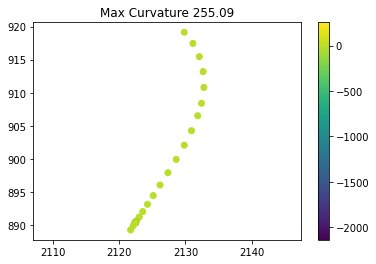

e0b14a8e11994763acba690bbcc3f56a
boston-seaport


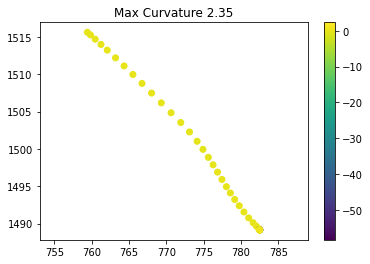

724957e51f464a9aa64a16458443786d
boston-seaport


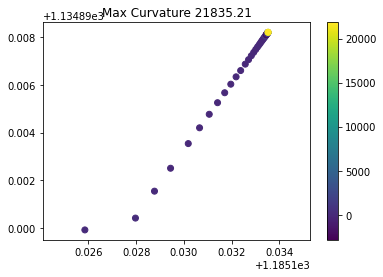

453453c849304ad69741891946d46453
boston-seaport


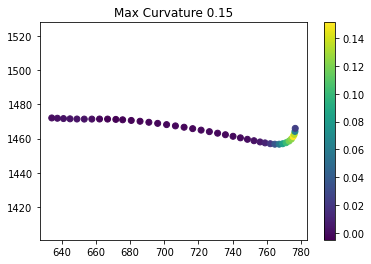

7e3a6bdd6c6f4c8fb018cff404974446
singapore-onenorth


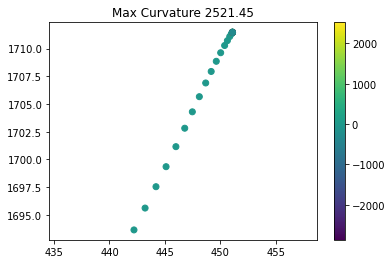

a6ebe93557f24cf9bcf613dbff0aab24
boston-seaport


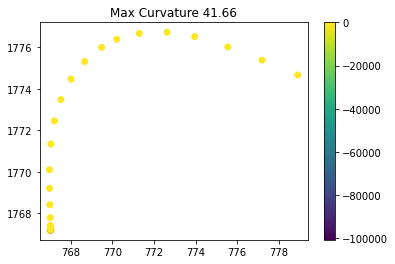

0c601ff2bf004fccafec366b08bf29e2
singapore-onenorth


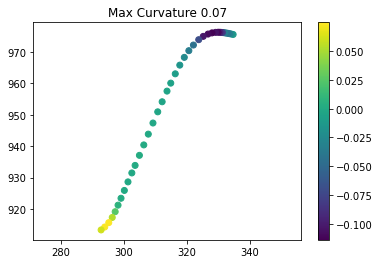

00590cbfa24a430a8c274b51e1c71231
singapore-onenorth


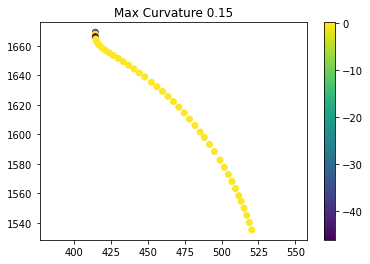

1d914f73a4a243c3acac50d24f083aac
singapore-onenorth


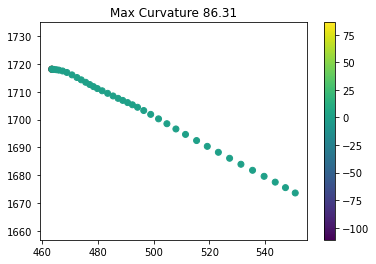

a25d763258dc4526b52759b3ddaad7ec
boston-seaport


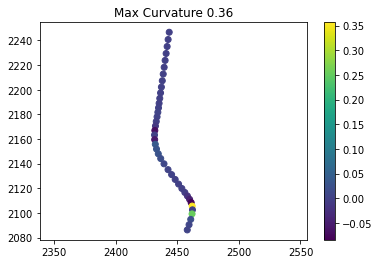

bfe368f8c6a44efcb323a82f6974a9a6
singapore-hollandvillage


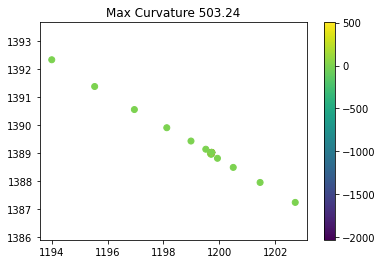

a59b6db922ff490da5ccfc9980700935
boston-seaport


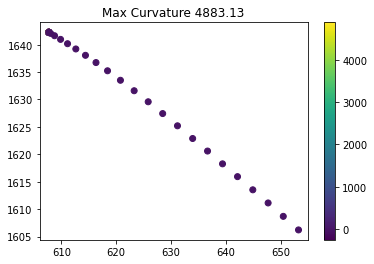

69e393da7cb54eb6bea7927a2af0d1ee
boston-seaport


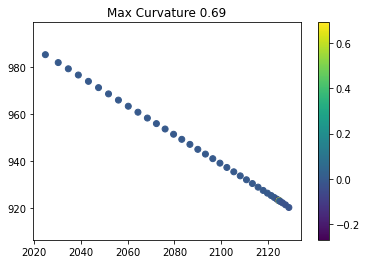

f69f7b4cefb7493bb1a8185f6f01d137
boston-seaport


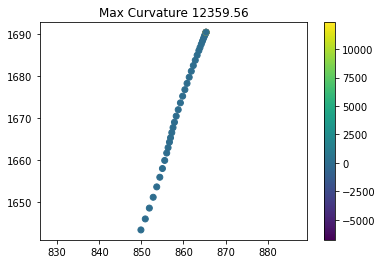

88abbe4f3b37466791b2ae58490044d9
singapore-queenstown


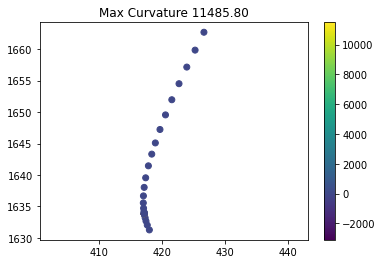

3bc4553925494890a21ef7a15c40eaed
boston-seaport


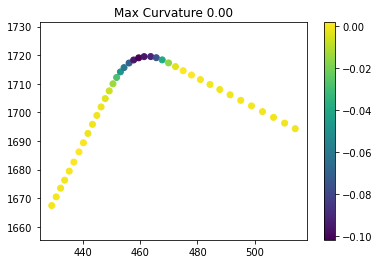

84f4c0747550493f959595dae6785cd3
boston-seaport


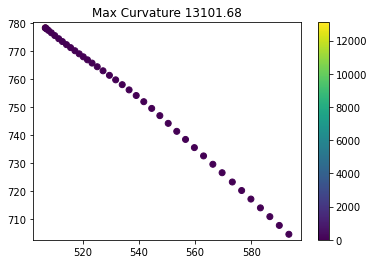

f0f120e4d4b0441da90ec53b16ee169d
boston-seaport


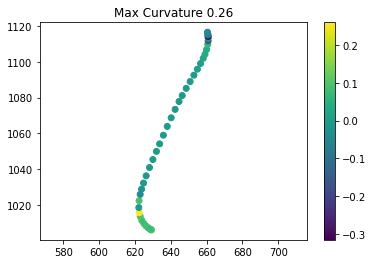

566311b8201e416f9f99463656dcadce
singapore-onenorth


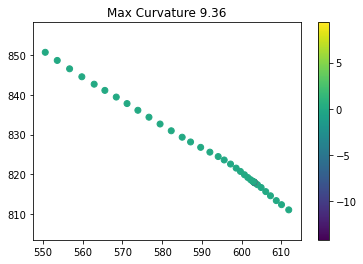

c92fdd793fbb4401b12782a9b8d4a499
singapore-onenorth


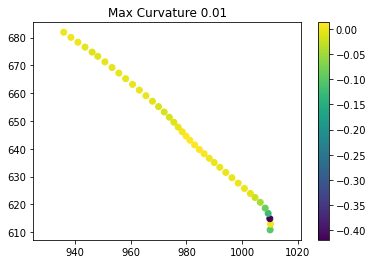

73030fb67d3c46cfb5e590168088ae39
singapore-onenorth


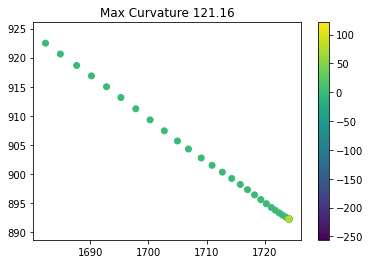

06c43bc74aff453081ce83eb126a756e
boston-seaport


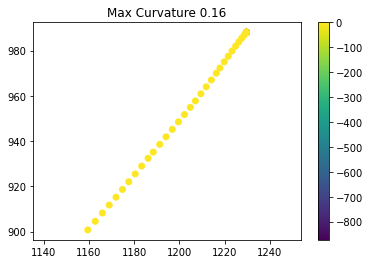

4772f5283211444eaabd463cd341d360
boston-seaport


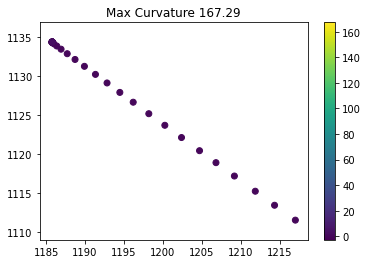

b528f78de55e41d9bb3382176dae1a4c
boston-seaport


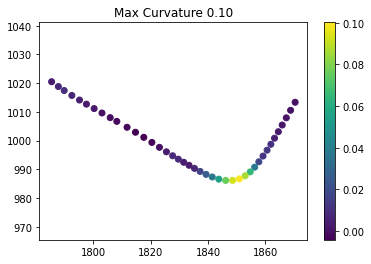

24d0c3ea8a2049468201c055667d6bc3
singapore-hollandvillage


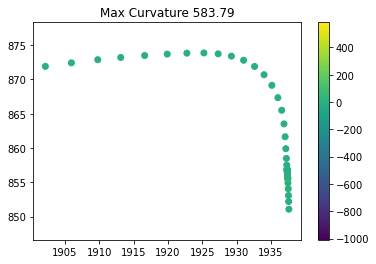

16e50a63b809463099cb4c378fe0641e
boston-seaport


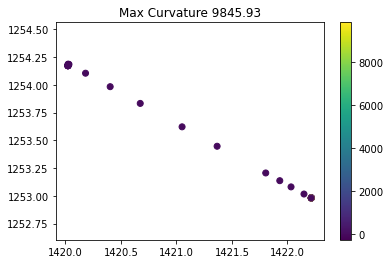

85e8f6d6743a4897b5e07e685267868e
boston-seaport


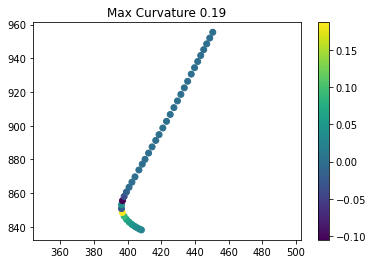

62696ecd66a3445da436ce2d87ee3501
boston-seaport


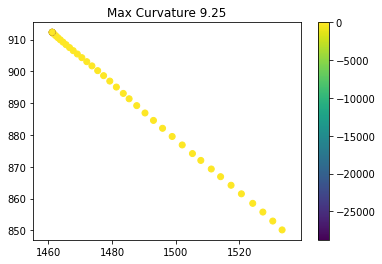

b0525843a3b0463f91d715deff733b8f
boston-seaport


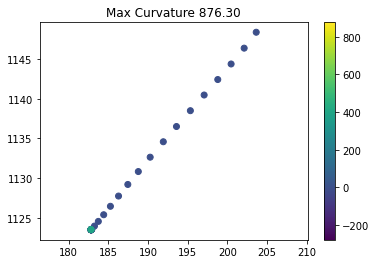

c2d5a5e7f7dc4e12b967fff22a0e1bf1
singapore-onenorth


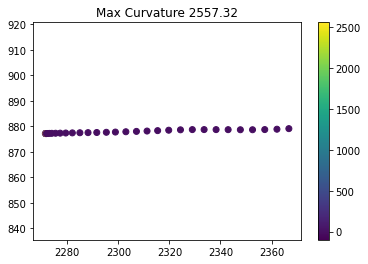

93608f0d57794ba6b014314c488e2b4a
boston-seaport


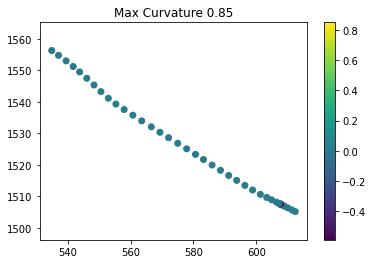

fb20ca9935c4439e8125ba830abcf9dc
boston-seaport


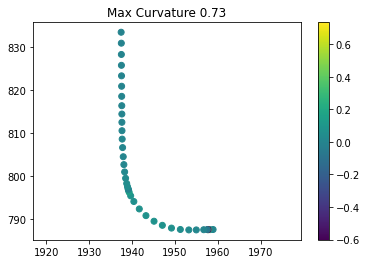

2eb0dd074d8e4a328fd2283184c4412e
boston-seaport


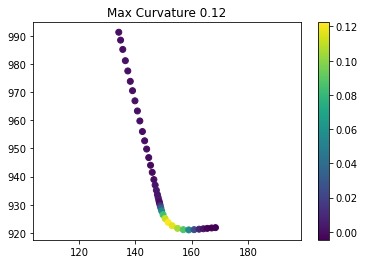

4f28b42169f4404cbab4b43476e13885
singapore-onenorth


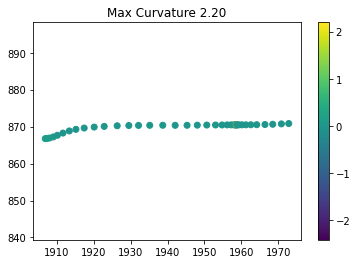

cb0cd06a1dd84271968466d7b65e48f8
boston-seaport


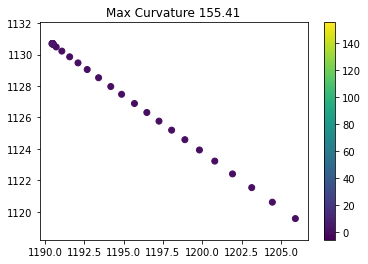

c9d654d4279c4efa9745a25ba6b373ee
boston-seaport


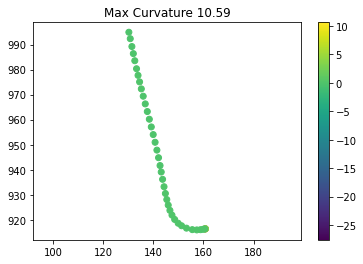

64bfc5edd71147858ce7446892d7f864
singapore-onenorth


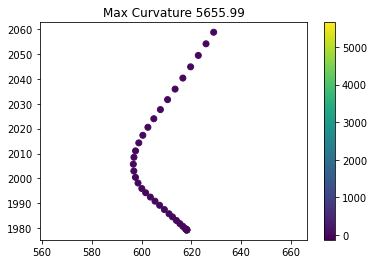

2175d0e84f224ea69907e5c338bde395
singapore-hollandvillage


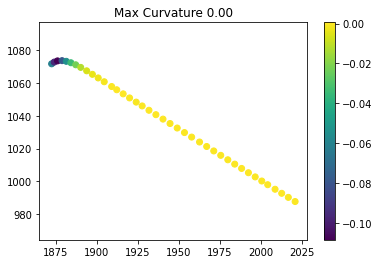

9f3c8453d03d4df5946444757376b826
boston-seaport


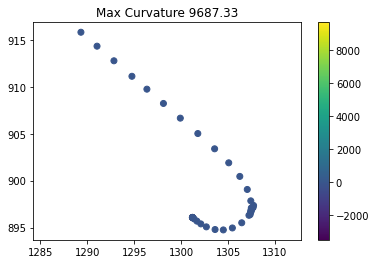

ca6e45c25d954dc4af6e12dd7b23454d
boston-seaport


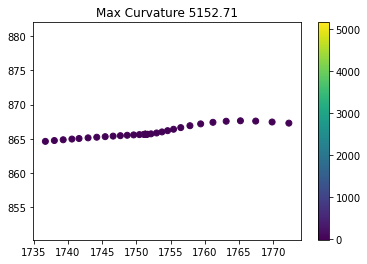

6193fac132614eb1a09dcbf3f359460f
boston-seaport


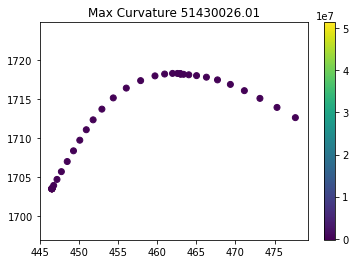

e209e66ff7834490b212c16cb12a1ce9
boston-seaport


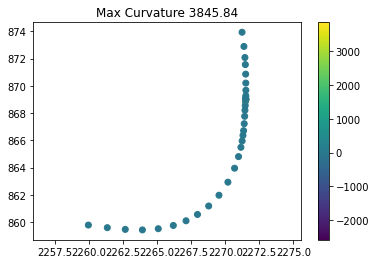

45275e709d4a4b0592d57850d8e8bd8d
boston-seaport


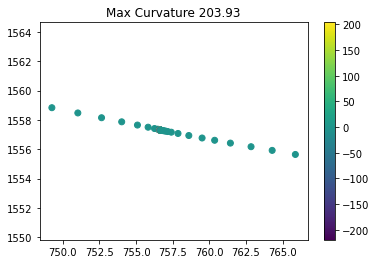

e12dee10fe2545e4ab88459ed4268bc6
singapore-queenstown


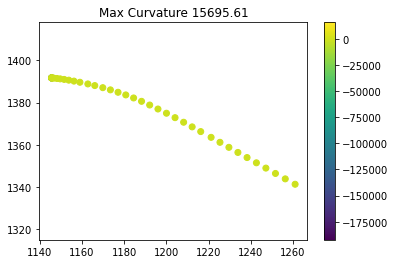

e15260c4ed5b4505900d497ef92ddd2d
boston-seaport


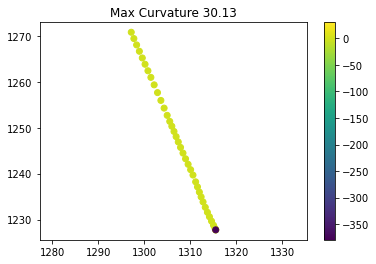

019b370afb444a2e8ce85654898307c8
singapore-queenstown


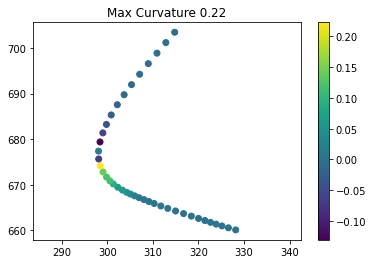

6946bd49ebe648b7a8c4555774059bc8
boston-seaport


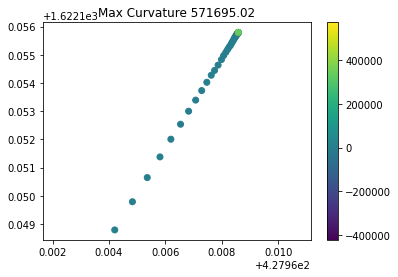

9e7d5adad1514dd79292e9318b7a443c
boston-seaport


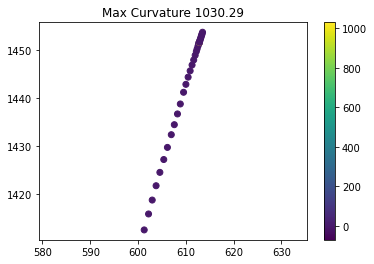

2ca15f59d656489a8b1a0be4d9bead4e
singapore-onenorth


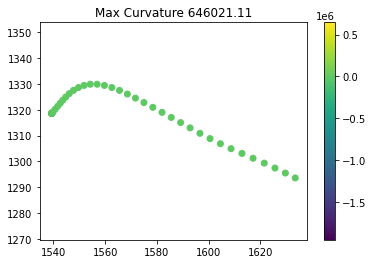

c5b36e5275cc4a2285d095e87347c49a
boston-seaport


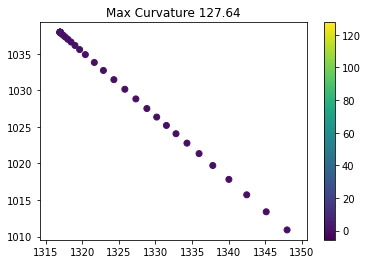

48ba943c3d19463a81281bf6a7078eac
boston-seaport


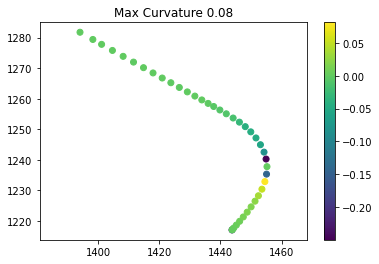

9c5dc664216e43a99d5da3f23d373e4d
boston-seaport


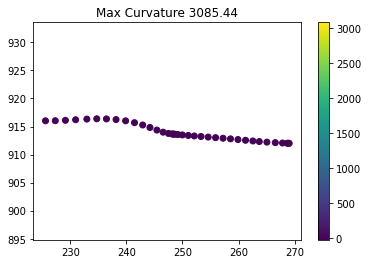

aacd6706a091407fb1b0e5343d27da7e
singapore-onenorth


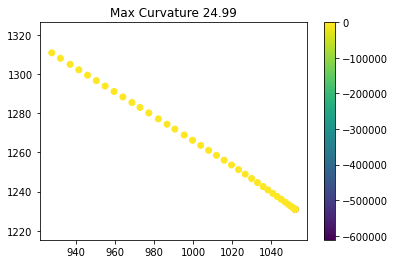

bd850592cd2541288b177b8e20baa31e
boston-seaport


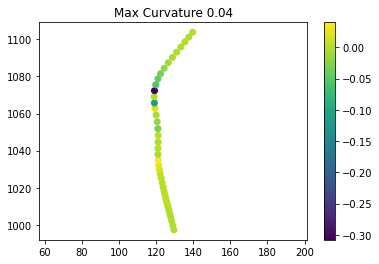

e005041f659c47e194cd5b18ea6fc346
singapore-onenorth


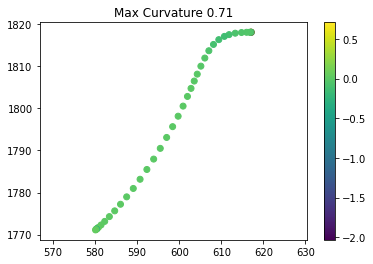

fb255bba9b6a4f37a8894e336d2136f1
singapore-queenstown


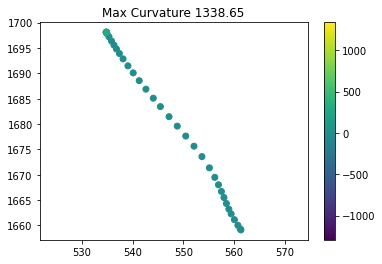

8180a1dbbba3479bb0c7f4ff6e9a3f0e
singapore-onenorth


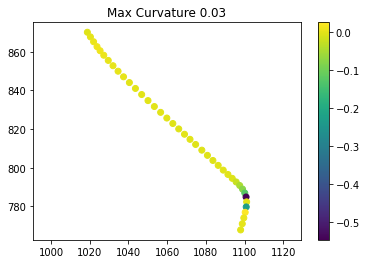

4ea72ee843914a6cbd755e39f2489156
singapore-onenorth


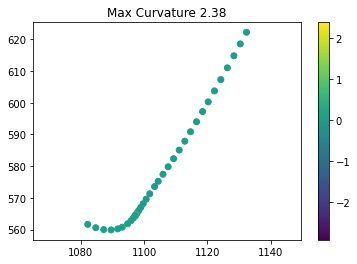

e6cb595f6df44b3999db28c65f2244ac
singapore-onenorth


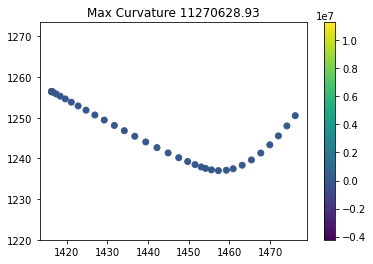

d033fb0d79ea42b9a356fa5162172598
boston-seaport


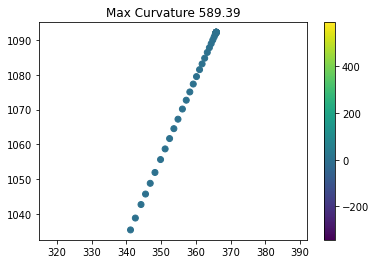

70368a18644046f898ab836fc8a3c03f
singapore-onenorth


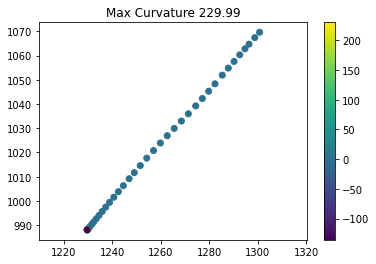

e02aee6f1fec4d13ad77044466da5fb4
boston-seaport


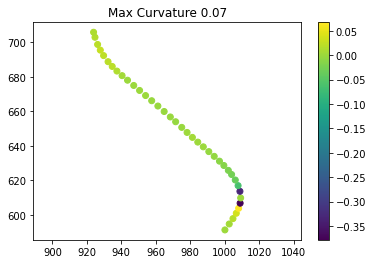

8b43539a55374b6c8ed60c95a42d63a2
singapore-onenorth


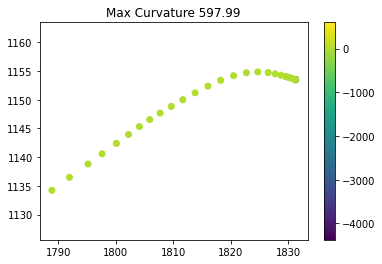

9d1307e95c524ca4a51e03087bd57c29
boston-seaport


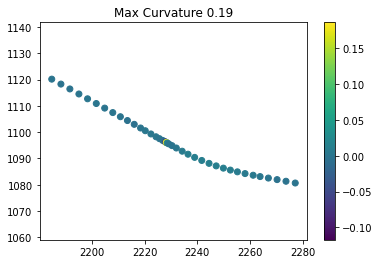

9068766ee9374872a380fe75fcfb299e
boston-seaport


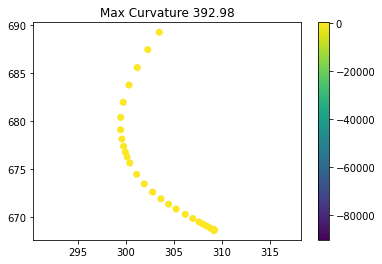

ea4c42715ae24b0b952c57a9af1e7731
boston-seaport


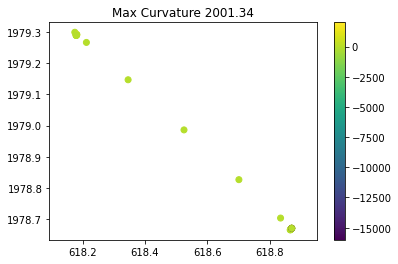

cd9db61edff14e8784678abb347cd674
singapore-hollandvillage


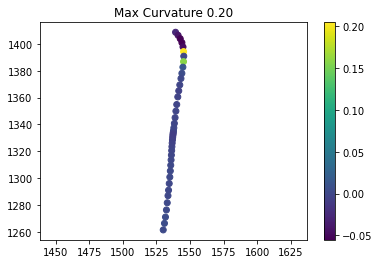

affb0caa5d2948f98cee5c42c7aefc1c
singapore-hollandvillage


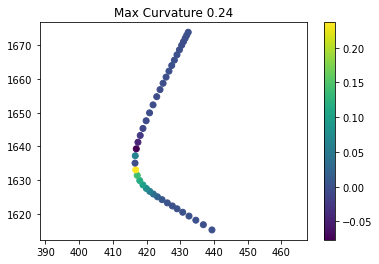

5e270cfc71714e2bb94bad445c6159a4
boston-seaport


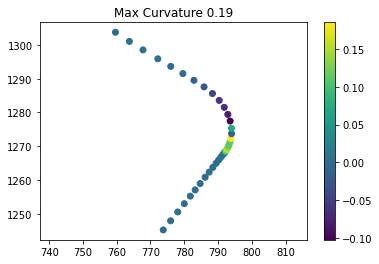

11058d54abcd4829828523040372ce05
singapore-onenorth


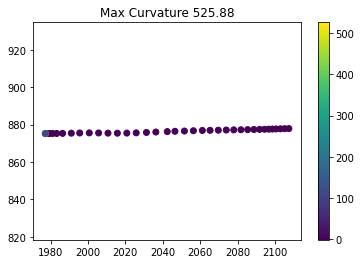

c133e78e55ae487c821803a3b183d1ab
boston-seaport


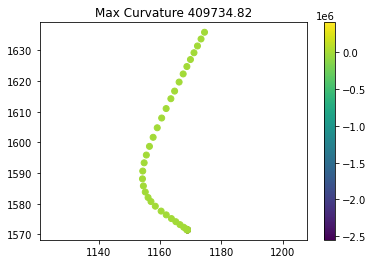

dcdea563c77544bb887de11d87619d3c
boston-seaport


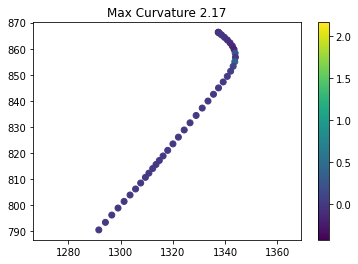

58af378ff68b49c99aabf320dca1ee25
boston-seaport


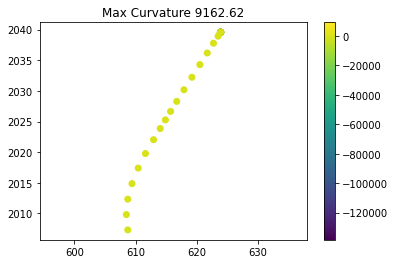

6498fce2f38645fc9bf9d4464b159230
singapore-hollandvillage


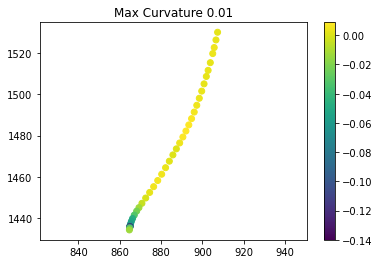

82aef599650d462db73731b7ff40918b
singapore-onenorth


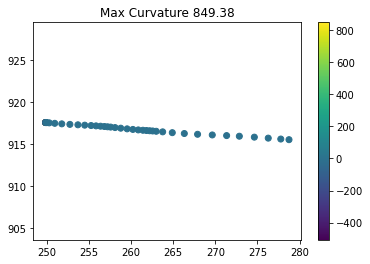

e7ef871f77f44331aefdebc24ec034b7
singapore-onenorth


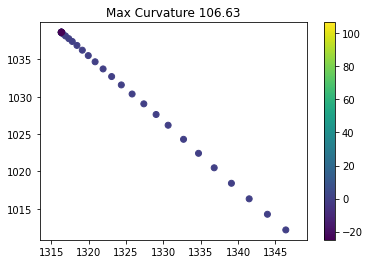

87a71839e68b46da8e91fb5f21b50c1c
boston-seaport


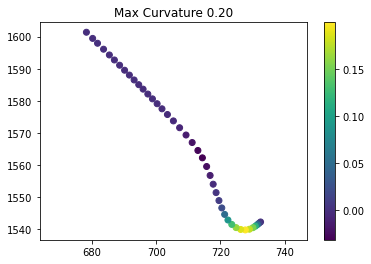

c4df079d260241ff8015218e29b42ea7
singapore-queenstown


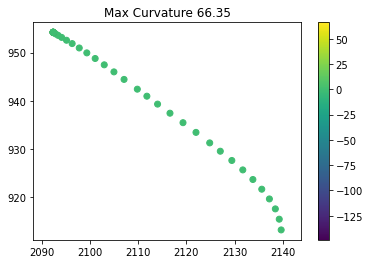

3927699fa562451a98bb13bf8405361d
boston-seaport


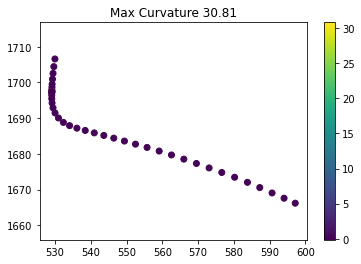

47cfdbcf14fe47d2a3b9e7e5b46d8a36
singapore-queenstown


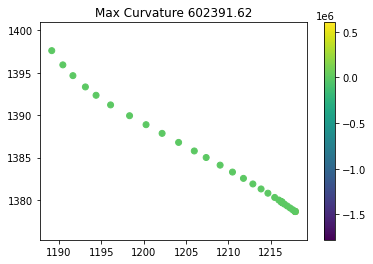

84e056bd8e994362a37cba45c0f75558
boston-seaport


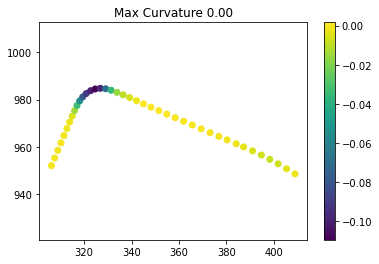

88084e0150d64dd1949a9cf1493e5188
singapore-onenorth


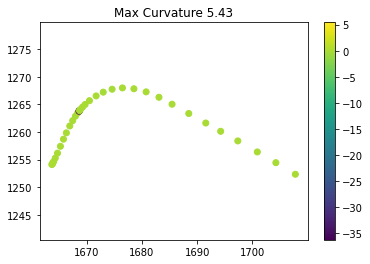

a178a1b5415f45c08d179bd2cacdf284
boston-seaport


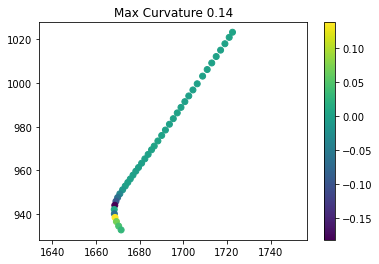

e3d714da71d2477695a055716ede7130
boston-seaport


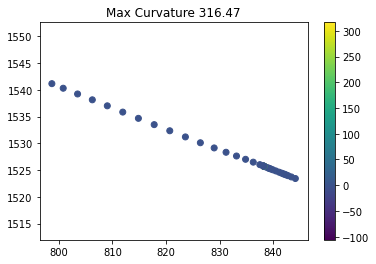

696a45dbd11346b794fdce43fa0a1770
singapore-queenstown


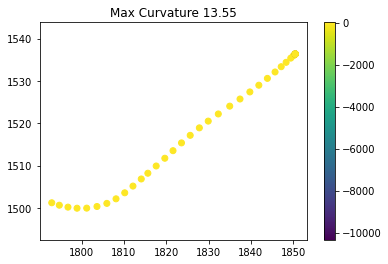

773e6b4f990f4044bed5ea7036ea7c3b
singapore-queenstown


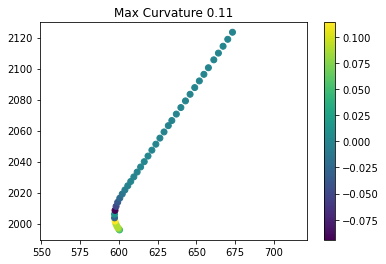

ced236f5da704cbcb41249bb6ecc8b68
singapore-hollandvillage


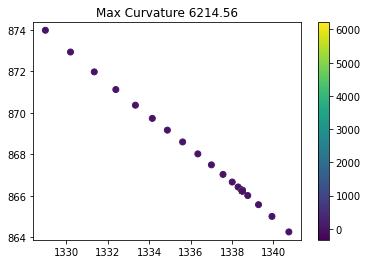

1623e7fab5174f2a84cf1b539233e3a6
boston-seaport


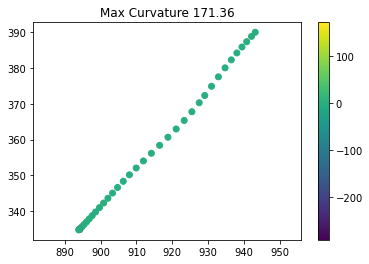

4f18d9a7ed374a0fb93c026589dcf9a0
boston-seaport


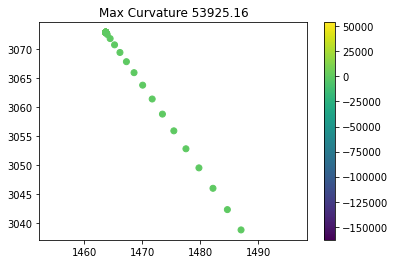

85d5e2548a5e454fa65a739ac0ac55c2
singapore-queenstown


In [8]:
for scene_id in list_of_high_curvature_scene_tokens:
    scene = nusc.get('scene', scene_id)
    location = nusc.get('log',scene['log_token'])['location']    
#     if location == "boston-seaport":
    pose_array = nbutils.get_ego_positions_from_scene(nusc, scene)
    curvature = nbutils.compute_curvature_from_array(pose_array)
    max_curv, min_curv = np.max(curvature), np.min(curvature)

#     if max_curv > 0.10:
#         list_of_high_curvature_scene_tokens.add(scene['token'])
    plt.title('Max Curvature %.02f'%(max_curv))
    plt.scatter(pose_array[0,:], pose_array[1,:],c=curvature)
    ax = plt.gca()
    ax.axis('equal')

    plt.colorbar()
    plt.show()    
    print(scene_id)
    print(location)

## Identifying Turns from Description

In [9]:
scene = nusc.scene[0]

In [13]:
left_turn_ids_from_phrases = nbutils.query_scenes_for_word(nusc, "turn left", query_phrase=True)
right_turn_ids_from_phrases = nbutils.query_scenes_for_word(nusc, "turn right", query_phrase=True)
turn_ids_from_words = nbutils.query_scenes_for_word(nusc, 'turn', query_phrase=False)

print("# Left Turns: %d"%len(left_turn_ids_from_phrases))
print("# Right Turns: %d"%len(right_turn_ids_from_phrases))
print("# Turns (from phrases): %d"%(len(left_turn_ids_from_phrases) + len(right_turn_ids_from_phrases)))
print("# Turns (all words): %d"%len(turn_ids_from_words))

# Left Turns: 86
# Right Turns: 103
# Turns (from phrases): 189
# Turns (all words): 215
